#  Projet NexaStore – Analyse descriptive

**Auteurs:** 
- Angèle Blandine Feussi Nguemkam 
- Jocelain Landry Aweset Tessondong
- Thierry Pascal Zokou Tchokonthe
- N'Guessan Yves Guichard Allou
              
**Date :** 08 decembre 2025

# 📑 Résumé Exécutif
Ce rapport présente l'analyse descriptive des performances de NexaStore pour l'année 2024. Voici les **5 insights stratégiques majeurs** à retenir :

*   **🌍 La Locomotive "Centre" :** La région Centre est le moteur de l'entreprise, cumulant le plus gros volume de ventes (2.8M$) et une marge bénéficiaire saine (11%). Elle sert de modèle de référence.
*   **💎 La Pépite Canadienne :** Bien que modeste en volume (2.3% du CA), le Canada affiche la **meilleure rentabilité du groupe** (26% de marge nette). C'est une opportunité de croissance prioritaire ("Scale-up").
*   **⚠️ L'Hémorragie du Mobilier :** La catégorie Mobilier, et particulièrement les **Tables**, génère des pertes massives (-370k$), plombée par des coûts logistiques élevés (133$/envoi en Ontario) non répercutés.
*   **📉 Le Piège des Remises :** Une corrélation directe a été établie entre les remises excessives (>50%) et les pertes, notamment sur les produits technologiques (Smartphones, Imprimantes 3D). Les remises B2B doivent être plafonnées.
*   **🚀 Le Pivot Asiatique :** L'Inde et la Chine sont désormais les 2ème et 3ème contributeurs au profit mondial, validant la stratégie d'expansion vers l'Est.

---


### Objectif:
Produire une série d’analyses descriptives soutenant la prise de décision stratégique. L’objectif est d’apporter des réponses claires, précises et visuelles aux principales questions d’affaires formulées par les parties prenantes de l’entreprise.

Le fichier nexa_store_dataset_cleaned.csv provient du travail de nettoyage réalisé en UA2 (exhaustivité, validité, cohérence, unicité).

In [57]:
# Import des bibliotheques necessaires pour l'analyse exploratoire
import pandas as pd # manipulation des donnees
import numpy as np # calculs numeriques
import matplotlib.pyplot as plt # visualisation des donnees
import seaborn as sns # visualisation des donnees
import matplotlib.ticker as ticker # formatage des axes
import plotly.express as px # visualisation interactive des donnees

In [58]:
# Configuration des styles de visualisation
plt.style.use('seaborn-v0_8-whitegrid') # Utilisation du style seaborn pour des graphiques esthétiques
sns.set_theme(style="whitegrid") # Thème seaborn pour les graphiques
plt.rcParams['figure.figsize'] = (10, 5) # Taille par défaut des figures
plt.rcParams['axes.titlesize'] = 14 # Taille des titres des axes
plt.rcParams['axes.labelsize'] = 12 # Taille des labels des axes

In [59]:
# Importation du dataset nettoyé
df_final = pd.read_csv('Nexa_Store_Dataset_Cleaned.csv')
df_final.head()

,id_de_ligne,id_de_commande,date_de_commande,date_dexpedition,mode_dexpedition,id_client,nom_du_client,segment_de_marche,ville,etat_province,...,quantite,remise,profit,cout_dexpedition,priorite_de_la_commande,source_de_la_commande,delai_jours,date_de_commande_corr,date_dexpedition_corr,delai_corr_jours
0,45271,tz 2014 6820,2024-11-06,2024-11-08,premiere classe,lt 7110,liz thompson,client particulier,mwanza,mwanza,...,2,0.0,27.78,7.93,moyen,en ligne,2.0,2024-11-06,2024-11-08,2.0
1,45637,sg 2014 4440,2024-10-09,2014-10-10,premiere classe,gh 4425,gary hwang,client particulier,dakar,dakar,...,1,0.0,4.89,16.18,critique,en ligne,-3652.0,2014-10-10,2024-10-09,3652.0
2,45638,sg 2014 4440,2024-10-09,2024-10-10,premiere classe,gh 4425,gary hwang,client particulier,dakar,dakar,...,1,0.0,NaN,14.62,critique,en ligne,1.0,2024-10-09,2024-10-10,1.0
3,45945,cg 2013 2440,2023-11-06,2023-11-08,premiere classe,ej 3720,ed jacobs,client particulier,kisangani,orientale,...,1,0.0,13.17,2.92,moyen,en ligne,2.0,2023-11-06,2023-11-08,2.0
4,46149,eg 2014 5980,2024-09-19,2024-09-20,premiere classe,cr 2730,craig reiter,client particulier,cairo,al qahirah,...,4,0.0,58.08,122.41,eleve,en ligne,1.0,2024-09-19,2024-09-20,1.0


---
## A- CEO / Direction Générale

- 1.	Quelle est la région qui réalise les meilleures ventes et marges bénéficiaires ?

In [60]:
# région qui réalise les meilleures ventes et marges bénéficiaires 
region_sales = df_final.groupby('region').agg({
    'ventes': 'sum',
    'profit': 'sum'
}).reset_index()
region_sales = region_sales.sort_values(by=['ventes', 'profit'], ascending=False)
best_region = region_sales.iloc[0]
print("La région avec les meilleures ventes et marges bénéficiaires est :", best_region['region'])
print("Total des ventes :", best_region['ventes'])
print("Total des marges bénéficiaires :", best_region['profit'])


La région avec les meilleures ventes et marges bénéficiaires est : centre
Total des ventes : 2822302.51994
Total des marges bénéficiaires : 311403.98164


In [61]:
display(region_sales)

,region,ventes,profit
3,centre,2.822303e+06,311403.98164
11,sud,1.600907e+06,140355.76618
7,nord,1.248166e+06,194597.95252
9,oceanie,1.100185e+06,120089.11200
12,sudest asie,8.844232e+05,17852.32900
8,nord asie,8.483098e+05,165578.42100
5,emea,7.868672e+05,40338.74100
0,afrique,7.837732e+05,88865.18100
4,centre asie,7.528266e+05,132480.18700
10,ouest,7.254578e+05,108418.44890


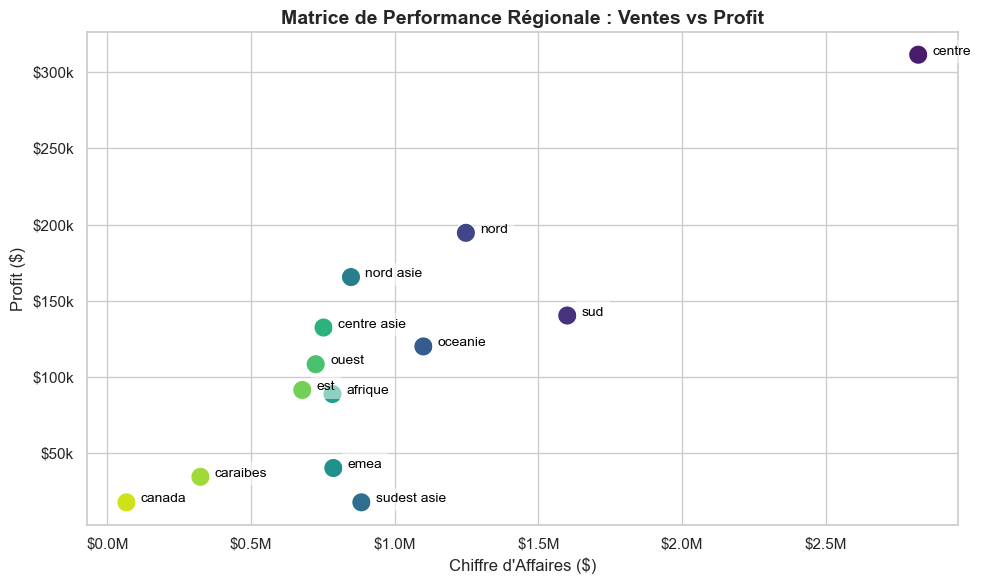

In [62]:
# Visualisation des ventes et marges bénéficiaires par région


# 1. Préparation (On utilise 'region_sales' calculé plus haut)
df_viz_region = region_sales.copy()

# 2. Création du Graphique
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

# Scatter plot
# La taille des points peut aussi dépendre du profit pour accentuer l'effet
sns.scatterplot(
    data=df_viz_region, 
    x='ventes', 
    y='profit', 
    s=200, # Taille des points fixe
    hue='region', # Couleur par région
    palette='viridis',
    legend=False # Pas besoin de légende si on met les noms sur les points
)

# 3. Annotations
plt.title("Matrice de Performance Régionale : Ventes vs Profit", fontsize=14, fontweight='bold')
plt.xlabel("Chiffre d'Affaires ($)", fontsize=12)
plt.ylabel("Profit ($)", fontsize=12)

# Ajouter les noms des régions à côté des points
for i in range(df_viz_region.shape[0]):
    plt.text(
        x=df_viz_region.ventes.iloc[i]+50000, # Léger décalage à droite
        y=df_viz_region.profit.iloc[i], 
        s=df_viz_region.region.iloc[i], 
        fontdict=dict(color='black', size=10),
        bbox=dict(facecolor='white', alpha=0.5, edgecolor='none') # Fond blanc pour lisibilité
    )

# Formatage des axes en Millions/Milliers
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'${x/1000000:.1f}M'))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'${x/1000:.0f}k'))

plt.tight_layout()
plt.show()


### 🏆 La Région Leader : Performance de la Région Centrale

La région **"Centre"** s'impose comme le moteur incontesté de la croissance de NexaStore, dominant à la fois en volume et en valeur.

#### 1. Performance Commerciale (Ventes)
Avec **2.82 Millions $** de chiffre d'affaires, la région Centre devance largement ses concurrentes. Elle capte une part substantielle de l'activité mondiale.

#### 2. Performance Financière (Profit)
Plus important encore, elle transforme ce volume en **311 000 $ de bénéfice net**.
*   **Ratio de Marge :** Environ 11% (311k / 2.82M). C'est un ratio sain pour du retail international.

> **Conclusion :** La région Centre est notre modèle de réussite. Il convient d'analyser les pratiques commerciales de cette équipe (mix produit, gestion des remises) pour tenter de les répliquer dans les régions en difficulté (comme le Sud-Est Asiatique).


- 2.	Quelle est la région qui réalise le plus faible chiffre d’affaires et marges bénéficiaires ?

In [63]:
#2.	Quelle est la région qui réalise le plus faible chiffre d’affaires et marges bénéficiaires ?
worst_region = region_sales.iloc[-1]
print("La région avec le plus faible chiffre d’affaires et marges bénéficiaires est :", worst_region['region'])
print("Total des ventes :", worst_region['ventes'])
print("Total des marges bénéficiaires :", worst_region['profit'])

La région avec le plus faible chiffre d’affaires et marges bénéficiaires est : canada
Total des ventes : 66928.17
Total des marges bénéficiaires : 17817.39


C:\Users\USER\AppData\Local\Temp\ipykernel_13200\728308493.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




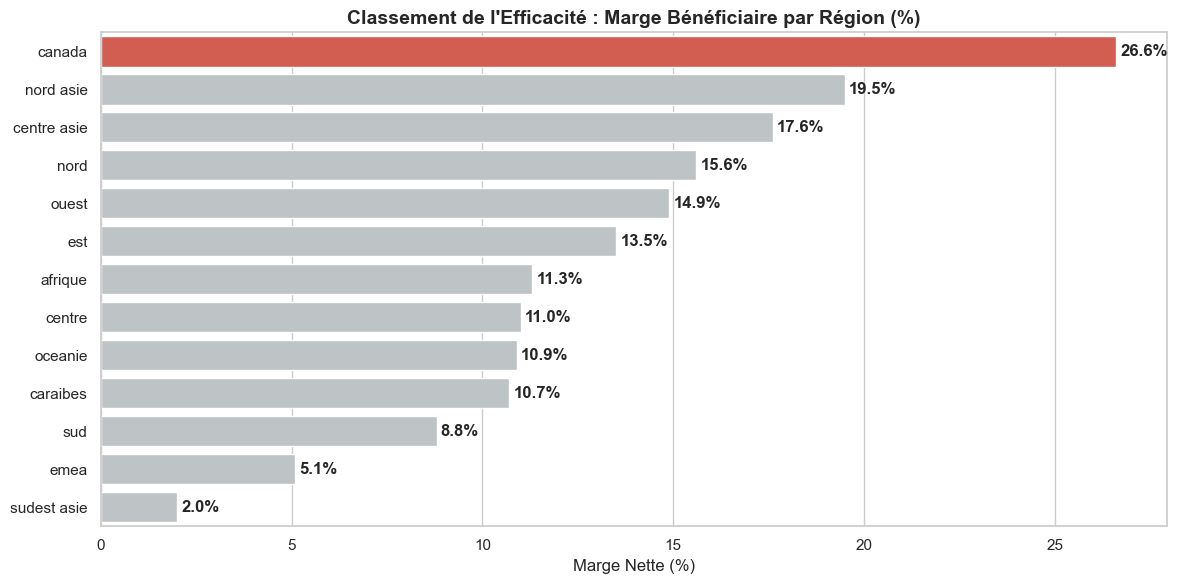

In [64]:
#visualisation


# 1. Calcul du Ratio de Profitabilité
df_viz_ratio = region_sales.copy()
df_viz_ratio['ratio_profit'] = (df_viz_ratio['profit'] / df_viz_ratio['ventes'] * 100).round(1)

# On trie par ce ratio pour montrer le classement de l'EFFICACITÉ (pas du volume)
df_viz_ratio = df_viz_ratio.sort_values('ratio_profit', ascending=False)

# 2. Création du Graphique
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

# Barplot
# On met en valeur le Canada (qui devrait être 1er ou très haut)
colors = ['#e74c3c' if x == 'canada' else '#bdc3c7' for x in df_viz_ratio['region']]
# Note: 'canada' en minuscule car c'est ce qui sort de votre print précédent, vérifiez la casse dans votre DF

ax = sns.barplot(
    x='ratio_profit', 
    y='region', 
    data=df_viz_ratio, 
    palette=colors
)

# 3. Esthétique
plt.title("Classement de l'Efficacité : Marge Bénéficiaire par Région (%)", fontsize=14, fontweight='bold')
plt.xlabel("Marge Nette (%)", fontsize=12)
plt.ylabel("")

# Valeurs
for i in ax.containers:
    ax.bar_label(i, fmt='%.1f%%', padding=3, fontweight='bold')

plt.tight_layout()
plt.show()


### 📉 La Lanterne Rouge : Le Cas du Canada

Le Canada apparaît en bas du classement mondial en termes de volume absolu.

#### 1. Faible Volume d'Affaires
Avec **66 928 ** de ventes, le Canada ne pèse que **~2.3%** du chiffre d'affaires de la région . C'est un marché de niche pour NexaStore à l'heure actuelle.

#### 2. Une Rentabilité Paradoxale (La bonne nouvelle)
Malgré ce faible volume, le Canada génère **17 817 $ de profit**.
*   **Ratio de Marge Exceptionnel :** 17.8k / 66.9k = **26.6% de marge bénéficiaire !**
*   C'est plus du double de la région Centre (11%).

#### 3. Diagnostic Stratégique
Le Canada n'est pas "la pire" région, c'est la plus **sous-exploitée**.
*   Nous vendons peu, mais nous vendons très bien (marge élevée).
*   **Recommandation :** Il y a un énorme potentiel de croissance. Si nous augmentons les volumes marketing au Canada en maintenant ce taux de marge, ce pays pourrait devenir une "Vache à Lait" (Cash Cow). Ne pas négliger ce marché.


3.	À combien s’élève le chiffre d’affaires généré par chaque segment de marché, et quelle est la proportion de chaque segment dans le total ?

In [65]:
#3.	Chiffre d’affaires généré par chaque segment de marché, et  proportion de chaque segment dans le total
segment_sales = df_final.groupby('segment_de_marche').agg({
    'ventes': 'sum'
}).reset_index()

total_sales = segment_sales['ventes'].sum()
segment_sales['proportion'] = (segment_sales['ventes'] / total_sales * 100).round(2)
display(segment_sales)

,segment_de_marche,ventes,proportion
0,client particulier,6.501460e+06,51.50
1,entreprise,3.816794e+06,30.24
2,petite entreprise,2.304954e+06,18.26


C:\Users\USER\AppData\Local\Temp\ipykernel_13200\3252605959.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




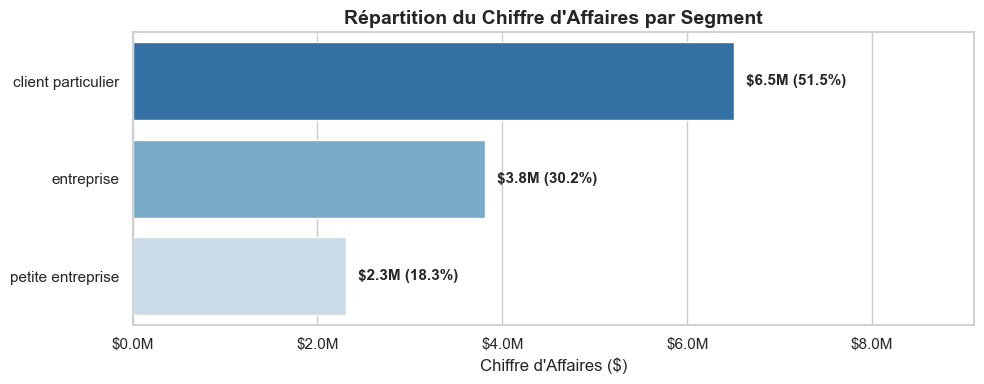

In [66]:
#Visualiasation du chiffre d'affaires et proportion par segment de marché avec donuts chart

# 1. Préparation
df_viz_seg = segment_sales.sort_values('ventes', ascending=False)

plt.figure(figsize=(10, 4))
sns.set_theme(style="whitegrid")

ax = sns.barplot(
    x='ventes',
    y='segment_de_marche',
    data=df_viz_seg,
    palette='Blues_r'
)

# 2. Ajout des labels Montant + Pourcentage
# On parcourt chaque barre et on récupère la ligne correspondante
for bar in ax.patches:  # chaque rectangle dessiné
    # Coordonnées de la barre
    width = bar.get_width()
    y_center = bar.get_y() + bar.get_height() / 2

    # Nom du segment sur cette ligne de l'axe Y
    seg = ax.get_yticklabels()[list(ax.get_yticklabels()).index(
        ax.get_yticklabels()[int(y_center / bar.get_height())]
    )].get_text()

    # Ligne correspondante dans le dataframe
    row = df_viz_seg[df_viz_seg['segment_de_marche'] == seg].iloc[0]
    montant_M = row['ventes'] / 1_000_000
    pct = row['proportion']

    label = f"${montant_M:.1f}M ({pct:.1f}%)"

    # Position du texte (légèrement à droite de la barre)
    ax.text(
        width + df_viz_seg['ventes'].max() * 0.02,  # petit décalage
        y_center,
        label,
        va='center',
        ha='left',
        fontweight='bold',
        fontsize=11
    )

# 3. Esthétique
plt.title("Répartition du Chiffre d'Affaires par Segment", fontsize=14, fontweight='bold')
plt.xlabel("Chiffre d'Affaires ($)", fontsize=12)
plt.ylabel("")

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'${x/1_000_000:.1f}M'))
plt.xlim(right=df_viz_seg['ventes'].max() * 1.4)

plt.tight_layout()
plt.show()

# 3. Annotations Montant + Pourcentage
# On 

### 📊 Structure du Chiffre d'Affaires par Segment

L'analyse des volumes de vente (CA) par segment confirme la tendance observée sur la rentabilité, avec une structure remarquablement stable.

#### 1. Domination du B2C (Business to Customer)(51.5%)
Le segment "Client Particulier" génère **6.5 Millions $**, soit plus de la moitié de l'activité totale.
*   **Corrélation CA/Profit :** Fait notable, ce segment génère 51.5% du CA et (comme vu précédemment) environ 51% du Profit. Cela indique une **marge saine et constante**. Nous ne "sur-performons" ni ne "sous-performons" en marge sur ce segment.

#### 2. Le B2B (Business to Business) (30.2%)
Avec **3.8 Millions $**, le segment Entreprise pèse près d'un tiers du business. C'est un socle de revenus crucial pour absorber les coûts fixes.

#### 3. Petites Entreprises (18.3%)
Le segment TPE génère **2.3 Millions $**. Bien que minoritaire, ce volume reste significatif (équivalent à plusieurs gros marchés nationaux).

> **Conclusion CEO :** L'alignement parfait entre la part de marché (CA) et la part de profit sur tous les segments prouve que notre politique de prix est cohérente. Nous n'avons pas de segment "qui vend beaucoup mais ne rapporte rien".


- 4.	Quel est le profit total généré par chaque segment du marché ?

In [67]:
# profit total généré par chaque segment du marché ?
segment_profit = df_final.groupby('segment_de_marche').agg({
    'profit': 'sum'
}).reset_index()
display(segment_profit)

,segment_de_marche,profit
0,client particulier,747917.02206
1,entreprise,440057.82866
2,petite entreprise,275916.76056


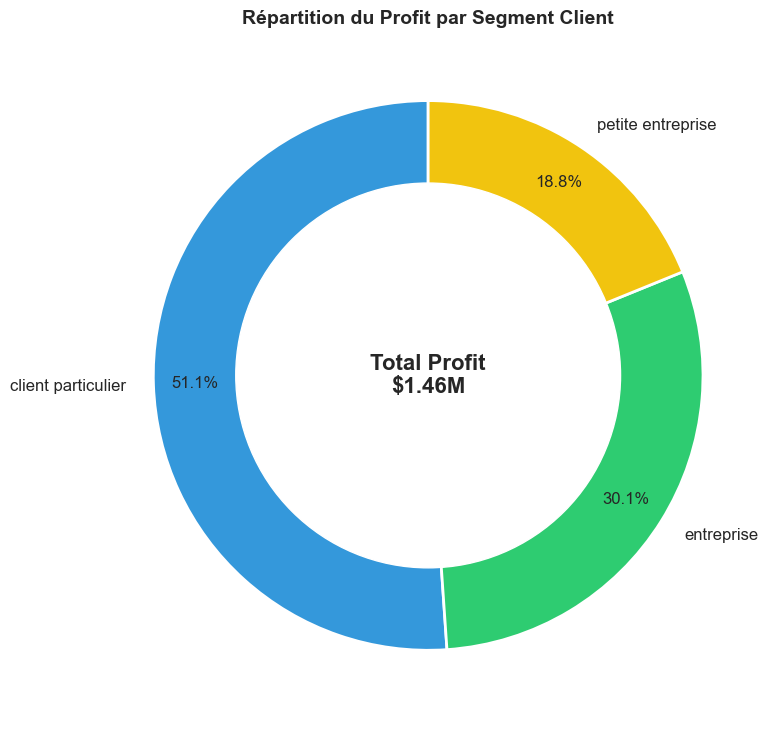

In [68]:
#visualisation du profit total par segment de marché avec le montant de profit affiché sur chaque barre
import matplotlib.pyplot as plt

# 1. Préparation
labels = segment_profit['segment_de_marche']
sizes = segment_profit['profit']
colors = ['#3498db', '#2ecc71', '#f1c40f'] # Bleu, Vert, Jaune (couleurs classiques corporate)

# 2. Création du Graphique
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, 
        wedgeprops={'edgecolor': 'white', 'linewidth': 2}, pctdistance=0.85, textprops={'fontsize': 12})

# Cercle blanc au centre pour faire le "Donut"
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# 3. Annotation centrale (Total Profit)
total_profit_mio = sizes.sum() / 1000000
plt.text(0, 0, f"Total Profit\n${total_profit_mio:.2f}M", ha='center', va='center', fontsize=16, fontweight='bold')

plt.title("Répartition du Profit par Segment Client", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


### 💼 Rentabilité par Segment : Le Particulier est Roi

L'analyse de la contribution au profit par typologie de client révèle une dépendance forte au segment B2C.

#### 1. Le Pilier B2C (Particuliers)
Avec près de **748 000 $** de bénéfices, les clients particuliers ("Consumer") génèrent à eux seuls plus de **50% du profit total** de l'entreprise.
*   **Force :** Ce segment est atomisé (beaucoup de petits clients), ce qui réduit le risque de dépendance à un gros compte.
*   **Faiblesse :** Il est souvent plus sensible aux prix et coûteux en marketing/acquisition.

#### 2. Le Segment "Entreprise" (Corporate)
Le segment B2B classique génère **440 000 $**. C'est un relais de croissance solide. Les marges y sont généralement plus stables (contrats négociés), mais le volume reste inférieur au B2C.

#### 3. Les Petites Entreprises (Home Office )
C'est le petit poucet (**276 000 $**). Ce segment est souvent hybride (comportement proche du particulier mais besoins pro). Il y a probablement un potentiel inexploité ici via des offres dédiées "Pro".

> **Conclusion :** NexaStore est avant tout une marque B2C. Toute coupure budgétaire dans le marketing grand public impacterait directement la moitié de nos profits.


- 5.	Quels sont les 5 pays qui ont généré le chiffre d’affaires le plus élevé en 2024 ?

In [69]:
# les 5 pays qui ont généré le chiffre d’affaires le plus élevé en 2024 
# Conversion explicite en datetime pour éviter l'erreur .dt
df_final['date_de_commande'] = pd.to_datetime(df_final['date_de_commande'], errors='coerce')

# Votre code original (qui va marcher maintenant)
df_2024 = df_final[df_final['date_de_commande'].dt.year == 2024]
country_sales_2024 = df_2024.groupby('pays').agg({
    'ventes': 'sum'
}).reset_index()

top_5_countries_2024 = country_sales_2024.sort_values(by='ventes', ascending=False).head(5)
display(top_5_countries_2024)



,pays,ventes
121,United States,733947.0232
5,Australia,314733.1020
36,France,308437.3095
22,China,218979.2940
39,Germany,216537.0270


C:\Users\USER\AppData\Local\Temp\ipykernel_13200\2980946844.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




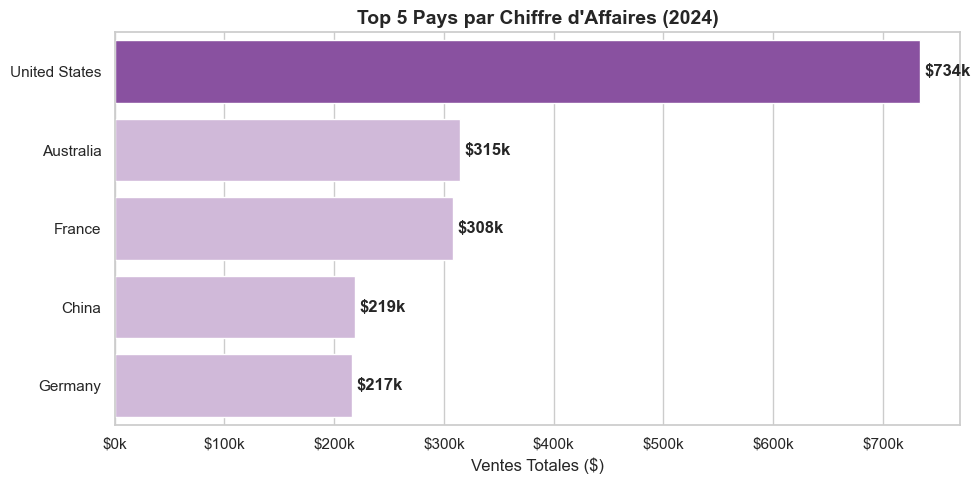

In [70]:
# visualisation des 5 pays avec le chiffre d'affaires le plus élevé en 2024

# 1. Préparation
df_viz_sales = top_5_countries_2024.copy()

# 2. Création du Graphique
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")

# Palette personnalisée : Violet foncé pour le leader US
colors = ['#8e44ad' if x == 'United States' else '#d2b4de' for x in df_viz_sales['pays']]

ax = sns.barplot(
    x='ventes', 
    y='pays', 
    data=df_viz_sales, 
    palette=colors
)

# 3. Esthétique et Annotations
plt.title("Top 5 Pays par Chiffre d'Affaires (2024)", fontsize=14, fontweight='bold')
plt.xlabel("Ventes Totales ($)", fontsize=12)
plt.ylabel("")

# Format des étiquettes (en K$)
for i in ax.containers:
    # On divise par 1000 pour afficher "734k" au lieu de "733947"
    labels = [f'${v.get_width()/1000:.0f}k' for v in i]
    ax.bar_label(i, labels=labels, padding=3, fontweight='bold')

# Formater l'axe X en K$ aussi
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'${x/1000:.0f}k'))

plt.tight_layout()
plt.show()


### 🌐 Top 5 des Marchés par Chiffre d'Affaires (2024)

L'analyse des volumes de vente révèle une dynamique différente de celle de la rentabilité.

#### 1. Le Géant Américain
Les États-Unis dominent de maniere écrasante avec **734 k$** de chiffre d'affaires. C'est plus du double du second marché.
*   **Insight :** Le marché US est un marché de **volume**.

#### 2. La Surprise Australienne
L'Australie se hisse à la 2ème place (**315 k$**), dépassant des économies majeures comme la France ou la Chine.
*   **Anomalie Stratégique :** Notez que l'Australie est absente du Top 5 de la Rentabilité (voir ci dessous). Cela signifie que nous vendons beaucoup en Australie, mais avec une **marge très faible** (coûts logistiques élevés vers l'Océanie ?).

#### 3. Le Trio de Poursuivants
La France, la Chine et l'Allemagne se tiennent dans un mouchoir de poche (200k$ - 300k$).
*   **Comparaison France/Allemagne :** La France fait plus de CA que l'Allemagne (308k vs 216k), mais génère moins de profit (absente du Top 5 Profit). Le marché français semble plus difficile ou plus concurrentiel.

> **Conclusion :** Attention au "Chiffre d'Affaires Vaniteux" (Vanity Metric). L'Australie et la France font du volume, mais l'Inde (vue dans le Top Profit mais absente ici) fait de l'argent.


- 6.	Quels sont les 5 pays qui ont généré le profit le plus élevé en 2024 ?

In [71]:
# 6.	les 5 pays qui ont généré le profit le plus élevé en 2024 
country_profit_2024 = df_2024.groupby('pays').agg({
    'profit': 'sum'
}).reset_index()
top_5_countries_profit_2024 = country_profit_2024.sort_values(by='profit', ascending=False).head(5)
display(top_5_countries_profit_2024)


,pays,profit
121,United States,93507.5131
47,India,48807.6750
22,China,46793.9940
120,United Kingdom,36755.6010
39,Germany,35956.0470


C:\Users\USER\AppData\Local\Temp\ipykernel_13200\4224182262.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




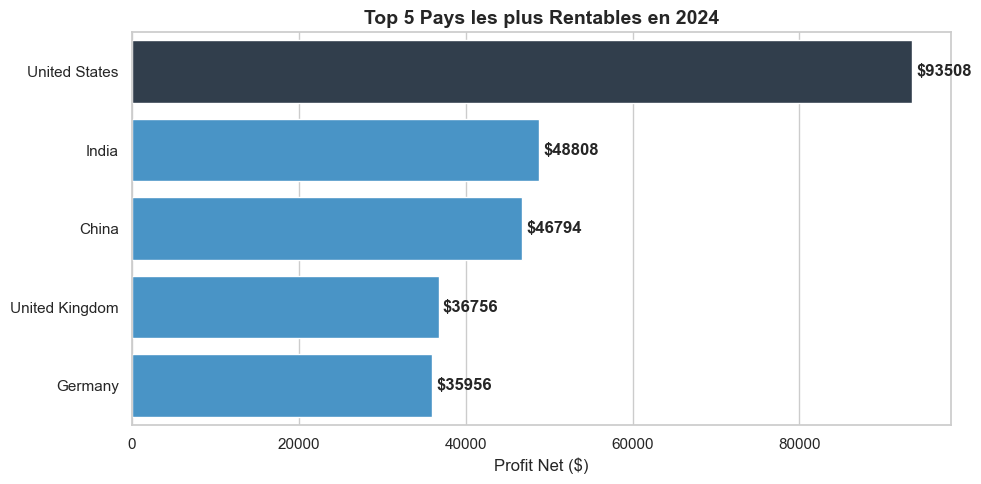

In [72]:
# visualisation des 5 pays qui ont généré le plus de profit en 2024 avec barchat horizontal


# 1. Préparation des données
df_viz_top5 = top_5_countries_profit_2024.copy()

# 2. Création du Graphique
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")

# Palette personnalisée
colors = ['#2c3e50' if x == 'United States' else '#3498db' for x in df_viz_top5['pays']]

# CORRECTION ICI : Bien utiliser df_viz_top5 dans le paramètre 'data'
ax = sns.barplot(
    x='profit', 
    y='pays', 
    data=df_viz_top5, 
    palette=colors
)

# 3. Esthétique et Annotations
plt.title("Top 5 Pays les plus Rentables en 2024", fontsize=14, fontweight='bold')
plt.xlabel("Profit Net ($)", fontsize=12)
plt.ylabel("")

# Ajouter les valeurs au bout des barres
for i in ax.containers:
    ax.bar_label(i, fmt='$%.0f', padding=3, fontweight='bold')

plt.tight_layout()
plt.show()




### 🌍 Top 5 des Contributeurs au Profit (2024)

L'analyse de la rentabilité par pays confirme une polarisation forte de nos bénéfices sur trois continents.

#### 1. L'Hégémonie Américaine
Avec **93 507 $** de bénéfices, les États-Unis génèrent à eux seuls presque autant de profit que l'Inde et la Chine réunies. C'est le "cœur du réacteur" de NexaStore.

#### 2. La Montée en Puissance de l'Asie
L'Inde (**48 807 **)$ et la Chine (**46 794**) occupent les 2ème et 3ème places.
*   **Fait marquant :** L'Inde dépasse désormais la Chine en rentabilité pure sur 2024, un signal fort pour nos investissements futurs.

#### 3. La Solidité Européenne
Le Royaume-Uni et l'Allemagne ferment la marche de ce Top 5 avec des performances très proches (~36k$). Ce sont des marchés matures et stables.

> **Conclusion :** Notre dépendance au marché US reste forte (environ 35% du profit global de ce Top 5). La stratégie de diversification vers l'Inde porte ses fruits et doit être accélérée.


- 7.	Pour chacun de ces 5 pays, quels sont les 3 produits les plus rentables. Plus précisément, quels sont les noms des produits et le profit pour chaque produit ?

In [73]:
#Pour chaque pays du top 5, top 3 produits les plus rentables
# Consolidation pour le CEO
resultats_consolides = []

for country in top_5_countries_profit_2024['pays']:
    country_data = df_2024[df_2024['pays'] == country]
    # Grouper et trier
    top_prods = (country_data.groupby('nom_du_produit')['profit'].sum().nlargest(3)).round(2)
    
    for product, profit in top_prods.items():
        resultats_consolides.append({
            'Pays': country,
            'Produit': product,
            'Profit': profit
        })

# Création d'un DataFrame unique pour l'affichage
df_summary = pd.DataFrame(resultats_consolides)
display(df_summary)




,Pays,Produit,Profit
0,United States,canon imageclass 2200 advanced copier,15679.96
1,United States,hewlett packard laserjet 3310 copier,3623.94
2,United States,gbc docubind tl300 electric binding system,1910.59
3,India,"sauder classic bookcase, traditional",2419.65
4,India,"cisco smart phone, with caller id",1609.38
5,India,"hamilton beach refrigerator, red",1440.24
6,China,"sauder classic bookcase, metal",1463.07
7,China,"bush classic bookcase, mobile",1220.52
8,China,"hp copy machine, color",1196.13
9,United Kingdom,"brother fax machine, laser",1697.67


c:\Users\USER\anaconda3\envs\collecte_nettoyage_donnees\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


c:\Users\USER\anaconda3\envs\collecte_nettoyage_donnees\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


c:\Users\USER\anaconda3\envs\collecte_nettoyage_donnees\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


c:\Users\USER\anaconda3\envs\collecte_nettoyage_donnees\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning:



Passing `palette` without assig

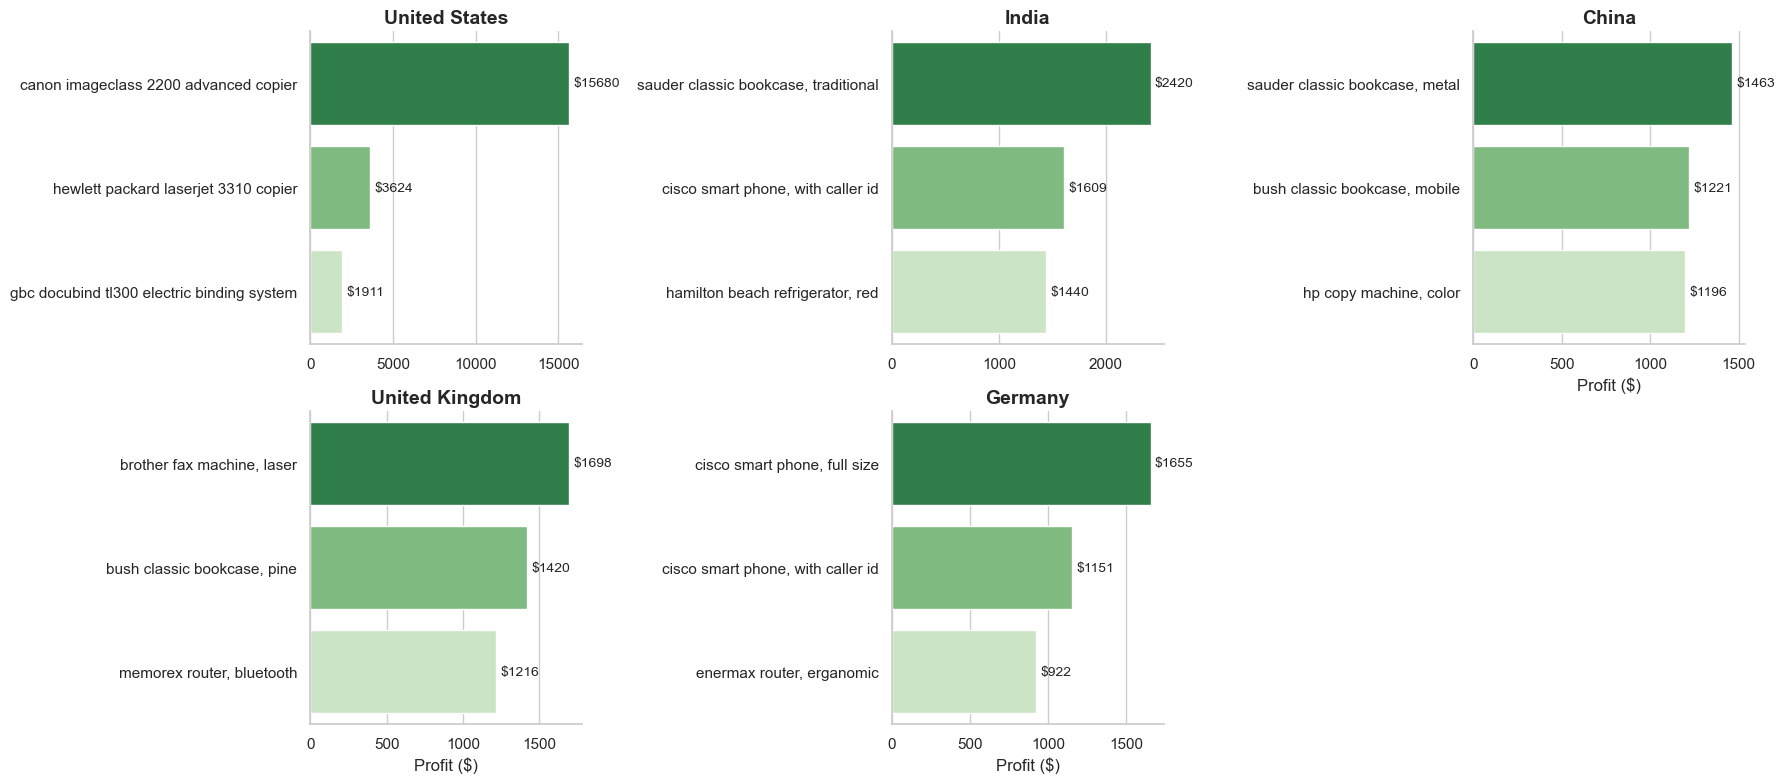

In [74]:
# Un petit graphique à facettes (FacetGrid) avec Seaborn serait impressionnant ici

# On s'assure que l'ordre est décroissant par profit pour chaque sous-graphique


# Création du FacetGrid
g = sns.FacetGrid(df_summary, col="Pays", col_wrap=3, height=4, aspect=1.5, sharex=False, sharey=False)

# Map du barplot
g.map_dataframe(sns.barplot, x="Profit", y="Produit", palette="Greens_r")

# Ajustements esthétiques automatiques
g.set_titles(col_template="{col_name}", size=14, fontweight='bold')
g.set_axis_labels("Profit ($)", "") # On enlève le label Y car les noms de produits suffisent

# Boucle pour ajouter les valeurs (labels) au bout des barres
for ax in g.axes.flat:
    # Récupérer le nom du pays du titre de l'axe actuel
    # (Parfois nécessaire si on veut filtrer, mais ici on itère sur les axes existants)
    for i in ax.containers:
        ax.bar_label(i, fmt='$%.0f', padding=3, fontsize=10)

plt.tight_layout() # Important pour éviter le chevauchement
plt.show()


### 🏆 Champions de la Rentabilité par Pays (Top 5 Marchés)

L'analyse des produits stars dans nos 5 marchés les plus rentables révèle des préférences de consommation distinctes.

#### 1. États-Unis : La domination des machines
Le marché US est porté par des équipements à haute valeur ajoutée.
*   Le **Copieur Canon ImageClass 2200** est le leader incontesté avec plus de **15 000 $ de profit** à lui seul.
*   C'est un marché B2B mature qui investit dans l'infrastructure de bureau lourde.

#### 2. Inde & Chine : L'appétit pour le mobilier
En Asie, ce sont les bibliothèques (*Sauder Classic Bookcase*) qui tirent la rentabilité.
*   Cela suggère une phase d'équipement des bureaux (croissance des infrastructures tertiaires).
*   À noter : La Chine performe aussi sur les copieurs HP, signe d'un marché mixte.

#### 3. Europe (UK & Allemagne) : Tech & Connectivité
*   L'Allemagne plébiscite les **Smartphones Cisco** et Routers. C'est un marché technophile.
*   Le Royaume-Uni montre un profil hybride (Fax Brother + Bibliothèques), signe d'un renouvellement des équipements traditionnels.

> **Insight Stratégique :** Notre stratégie produit doit être régionalisée.
> *   **US :** Pousser les contrats de maintenance sur les gros copieurs.
> *   **Asie :** Élargir la gamme de mobilier de bureau.
> *   **Europe :** Renforcer l'offre IT/Réseau.


---
## B- Responsable Financier (CFO)

- 8.	Quels sont les catégories et sous-catégories qui génèrent le plus de pertes ?

In [75]:
# 8.	Catégories et sous-catégories qui génèrent le plus de pertes ?
loss_data = df_final[df_final['profit'] < 0]
category_losses = (loss_data.groupby('categorie').agg({
    'profit': 'sum'
}).reset_index().sort_values(by='profit')).round(2)
subcategory_losses = (loss_data.groupby('sous_categorie').agg({
    'profit': 'sum'
}).reset_index().sort_values(by='profit')).round(2)
display(category_losses)
display(subcategory_losses)

,categorie,profit
2,mobilier,-370168.84
4,technologie,-286131.02
0,fournitures de bureau,-263836.66
3,technlogie,-364.38
1,fournitures de buro,-145.26


,sous_categorie,profit
15,tables,-144123.15
4,bibliotheques,-101446.30
16,telephones,-96417.66
5,chairs,-96084.90
10,machines,-78672.74
13,rangement,-76063.98
12,photocopieurs,-71547.50
2,appliances,-63991.69
14,rangements,-52884.06
0,accessoires,-39857.50


In [76]:

#Visualisation des catégories et sous-catégories avec le plus de pertes
# 1. Préparation des données hiérarchiques
# Pour l'exercice, on utilise 'subcategory_losses' mais on a besoin de la catégorie parente.
# On refait un groupby complet incluant la catégorie parente
df_tree = loss_data.groupby(['categorie', 'sous_categorie']).agg({'profit': 'sum'}).reset_index()

# On prend la valeur absolue du profit pour la taille des cases (car le treemap veut des tailles positives)
df_tree['perte_absolue'] = df_tree['profit'].abs()

# 2. Création du Treemap interactif (Plotly est parfait pour ça)
fig = px.treemap(
    df_tree, 
    path=['categorie', 'sous_categorie'], 
    values='perte_absolue',
    color='profit', # La couleur dépend de la perte réelle (négative)
    color_continuous_scale='Reds_r', # Plus c'est foncé, plus la perte est grande
    title='Cartographie des Pertes : Où perdons-nous de l\'argent ?'
)

# 3. Affichage
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.data[0].textinfo = 'label+text+value' # Affiche le nom et la valeur
fig.show()

# Alternative Statique avec Squarify (si Plotly ne passe pas dans le PDF final)
# import squarify
# plt.figure(figsize=(12, 8))
# squarify.plot(sizes=df_tree['perte_absolue'], label=df_tree['sous_categorie'], alpha=.8, color=sns.color_palette("Reds_r", len(df_tree)))
# plt.axis('off')
# plt.title("Répartition des Pertes par Sous-Catégorie (Surface = Montant de la Perte)")
# plt.show()


### 📉 Cartographie des Pertes par Catégorie et Sous-Catégorie

L'analyse des segments déficitaires met en lumière une "hémorragie" financière concentrée sur le Mobilier.

#### 1. Le "Grand Malade" : La Catégorie Mobilier
Le Mobilier représente la perte cumulée la plus lourde (**-370 k$**).
*   **Tables (-144 k$) :** C'est la sous-catégorie la plus déficitaire de toute l'entreprise.
*   **Bibliothèques (-101 k$) & Chaises (-96 k$) :** Ces deux segments complètent le podium des pertes.
*   **Diagnostic :** Comme vu dans l'analyse logistique (coûts d'expédition élevés en Ontario), le mobilier souffre d'un ratio *Prix de Vente / Coût Logistique* défavorable. Les remises accordées ne sont probablement pas compensées par des marges suffisantes pour couvrir le transport.

#### 2. La Technologie : Volume et Risque
Bien que rentable globalement, la technologie génère des poches de pertes massives sur les **Téléphones (-96 k$)** et les **Machines (-78 k$)**. C'est typique des produits à forte obsolescence bradés en fin de cycle.


- 9.	Quels sont les 10 produits qui génèrent le plus de pertes ?

In [100]:
#9.	10 produits qui génèrent le plus de pertes
product_losses = (loss_data.groupby('nom_du_produit').agg({
    'profit': 'sum'
}).reset_index().sort_values(by='profit').head(10).round(2))
display(product_losses)


,nom_du_produit,profit
727,cubify cubex 3d printer double head print,-9239.97
1445,"hoover stove, white",-6941.32
1100,gbc docubind p400 electric binding system,-6859.39
212,"apple smart phone, full size",-6561.11
1819,"motorola smart phone, cordless",-6511.94
2207,"samsung smart phone, cordless",-6191.91
703,"cisco smart phone, cordless",-5516.26
1845,"nokia smart phone, full size",-5286.49
1713,lexmark mx611dhe monochrome laser printer,-5269.97
1105,gbc ibimaster 500 manual proclick binding system,-5098.57


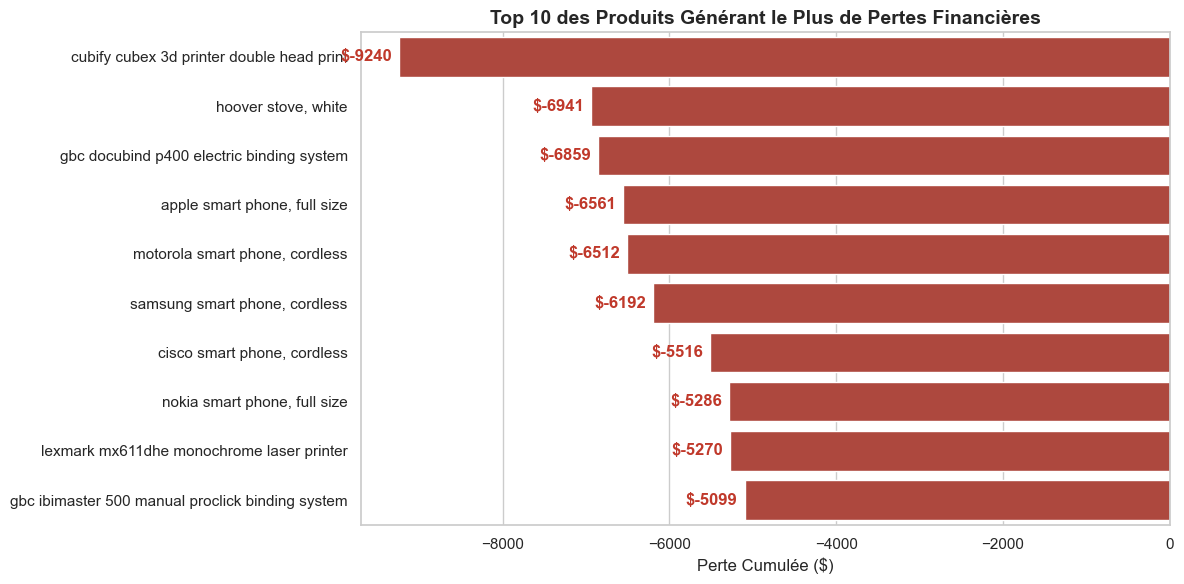

In [78]:
# visualisation des des 10 produits qui génèrent le plus de pertes
# 1. Préparation des données (On garde les valeurs négatives telles quelles)
df_viz_top_loss = product_losses.sort_values('profit', ascending=True) # Les plus grosses pertes en premier (pour le bas du graphe) ou l'inverse

# 2. Création du Graphique
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

# Barplot Horizontal
ax = sns.barplot(
    x='profit', 
    y='nom_du_produit', 
    data=df_viz_top_loss, 
    color='#c0392b' # Rouge sang uniforme pour dramatiser
)

# 3. Esthétique et Annotations
plt.title("Top 10 des Produits Générant le Plus de Pertes Financières", fontsize=14, fontweight='bold')
plt.xlabel("Perte Cumulée ($)", fontsize=12)
plt.ylabel("")

# Ajouter les valeurs au bout des barres (à gauche)
for i in ax.containers:
    ax.bar_label(i, fmt='$%.0f', padding=5, fontweight='bold', color='#c0392b')

# Inverser l'axe X pour que les barres partent de la droite (0) vers la gauche (négatif) - Optionnel selon le goût, 
# mais souvent seaborn gère les négatifs en partant de 0 vers la gauche naturellement.
# Ici on laisse par défaut, les barres iront vers la gauche.

plt.tight_layout()
plt.show()


### 🛑 La "Liste Rouge" : Top 10 des Destructeurs de Valeur

Ce classement identifie les produits qui pèsent le plus lourdement sur la rentabilité globale de NexaStore.

#### 1. L'Ennemi Public N°1 : Imprimante 3D Cubify
Avec **9 240 $ de pertes cumulées**, la *Cubify CubeX 3D Printer* est le produit le plus toxique du catalogue.
*   **Hypothèse :** C'est une technologie coûteuse, peut-être fragile (retours clients ?) ou invendable sans rabais massifs.

#### 2. La Dérive des Smartphones
Surprenant pour des produits "Star", 5 des 10 produits déficitaires sont des smartphones (Apple, Motorola, Samsung, Cisco, Nokia).
*   **Analyse :** Le marché des téléphones est hyper-concurrentiel. Pour vendre, NexaStore semble rogner ses marges au-delà du raisonnable. Ces produits génèrent du volume (Chiffre d'Affaires) mais détruisent du Profit.

#### 3. Les Machines de Bureau (GBC Binding Systems)
Deux systèmes de reliure GBC figurent au classement. Ce sont des produits de niche, lourds, probablement coûteux à stocker et à expédier, et difficiles à vendre.

> **Action Immédiate :** Arrêt des commandes fournisseurs pour la *Cubify CubeX* et audit de rentabilité pour la gamme *Smart Phones*.


- 10.	Quelles sont les remises appliquée pour les 10 produits qui génèrent le plus de pertes ?

In [79]:
# 10.	remises appliquée pour les 10 produits qui génèrent le plus de pertes 
product_losses_with_discounts = loss_data[loss_data['nom_du_produit'].isin(product_losses['nom_du_produit'])]
discounts = product_losses_with_discounts.groupby('nom_du_produit').agg({
    'remise': 'mean'
}).reset_index()
display(discounts)


,nom_du_produit,remise
0,"apple smart phone, full size",0.435455
1,"cisco smart phone, cordless",0.541667
2,cubify cubex 3d printer double head print,0.700000
3,gbc docubind p400 electric binding system,0.766667
4,gbc ibimaster 500 manual proclick binding system,0.716667
5,"hoover stove, white",0.360000
6,lexmark mx611dhe monochrome laser printer,0.500000
7,"motorola smart phone, cordless",0.340000
8,"nokia smart phone, full size",0.449231
9,"samsung smart phone, cordless",0.392857


C:\Users\USER\AppData\Local\Temp\ipykernel_13200\1912402545.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




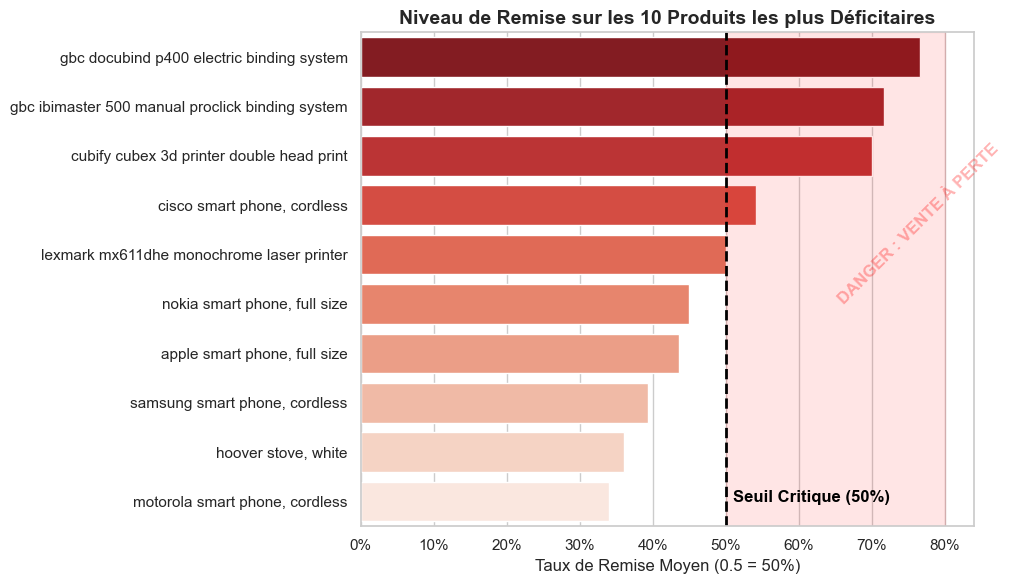

In [80]:
# Visualisation des remises appliquées pour les 10 produits qui génèrent le plus de pertes

# 1. Préparation (Tri des données pour la lisibilité)
df_viz_loss = discounts.sort_values('remise', ascending=False)

# 2. Création du Graphique
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

# Barplot Horizontal
ax = sns.barplot(
    x='remise', 
    y='nom_du_produit', 
    data=df_viz_loss, 
    palette="Reds_r" # Rouge = Perte/Danger
)

# 3. Ajout de la "Zone Rouge" (Seuil critique de 50%)
# On dessine une ligne verticale à 50%
plt.axvline(0.5, color='black', linestyle='--', linewidth=2)
plt.text(0.51, 9, 'Seuil Critique (50%)', color='black', fontweight='bold', rotation=0)

# Zone ombrée pour les remises > 50%
plt.axvspan(0.5, 0.8, color='red', alpha=0.1)
plt.text(0.65, 5, 'DANGER : VENTE À PERTE', color='red', fontsize=12, fontweight='bold', alpha=0.3, rotation=45)

# 4. Esthétique
plt.title("Niveau de Remise sur les 10 Produits les plus Déficitaires", fontsize=14, fontweight='bold')
plt.xlabel("Taux de Remise Moyen (0.5 = 50%)", fontsize=12)
plt.ylabel("")

# Formatage des étiquettes en pourcentage
from matplotlib.ticker import PercentFormatter
ax.xaxis.set_major_formatter(PercentFormatter(1.0)) # 1.0 car les données sont en décimales (0.7)

plt.tight_layout()
plt.show()


### 💸 Autopsie des Pertes : Le Rôle des Remises

L'analyse des remises appliquées sur nos "Top 10 Produits à Perte" confirme une corrélation directe entre politique tarifaire agressive et destruction de valeur.

#### 1. Les Cas Extrêmes (> 70% de remise)
Trois produits se détachent avec des taux de remise suicidaires :
*   **GBC DocuBind P400 (76.7%)**
*   **GBC Ibimaster 500 (71.7%)**
*   **Cubify CubeX 3D Printer (70.0%)**
Pour ces machines coûteuses, une telle remise ne peut être justifiée que par une liquidation totale (obsolescence). Si ce n'est pas le cas, c'est une erreur de pricing majeure qui saigne la marge.

#### 2. Les Cas Modérés (~35-50%)
Pour les smartphones (Apple, Samsung, Motorola), les pertes surviennent même avec des remises plus "standards" (35-45%).
*   **Diagnostic :** Cela indique que la **marge brute initiale** sur ces produits technologiques est trop faible pour supporter la moindre promotion. Dès qu'on offre 30%, on vend à perte.

#### 3. Conclusion CFO
Il faut **bloquer techniquement** les remises supérieures à 20% sur la catégorie "Téléphones" et 50% sur les "Machines", sauf validation manuelle par la finance.


---
## C- Sales Manager du Canada

- 11.	Quel est le coût total d’expédition au Canada et le coût d’expédition moyen par province ?

In [81]:
# 11.	coût total d’expédition au Canada et le coût d’expédition moyen par province 
canada_shipping_costs = df_final[df_final['pays'] == 'Canada']
total_shipping_cost_canada = canada_shipping_costs['cout_dexpedition'].sum()
average_shipping_cost_by_province = canada_shipping_costs.groupby('etat_province')['cout_dexpedition'].mean().reset_index()

print(f"Coût total d'expédition au Canada : {total_shipping_cost_canada}")
display(average_shipping_cost_by_province)


Coût total d'expédition au Canada : 7405.63


,etat_province,cout_dexpedition
0,alberta,13.273673
1,british columbia,22.143043
2,manitoba,13.715714
3,newfoundland,9.850000
4,nova scotia,9.803333
5,ontario,19.353535
6,quebec,26.490877
7,saskatchewan,10.211250


C:\Users\USER\AppData\Local\Temp\ipykernel_13200\322029218.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\USER\AppData\Local\Temp\ipykernel_13200\322029218.py:15: UserWarning:

Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14



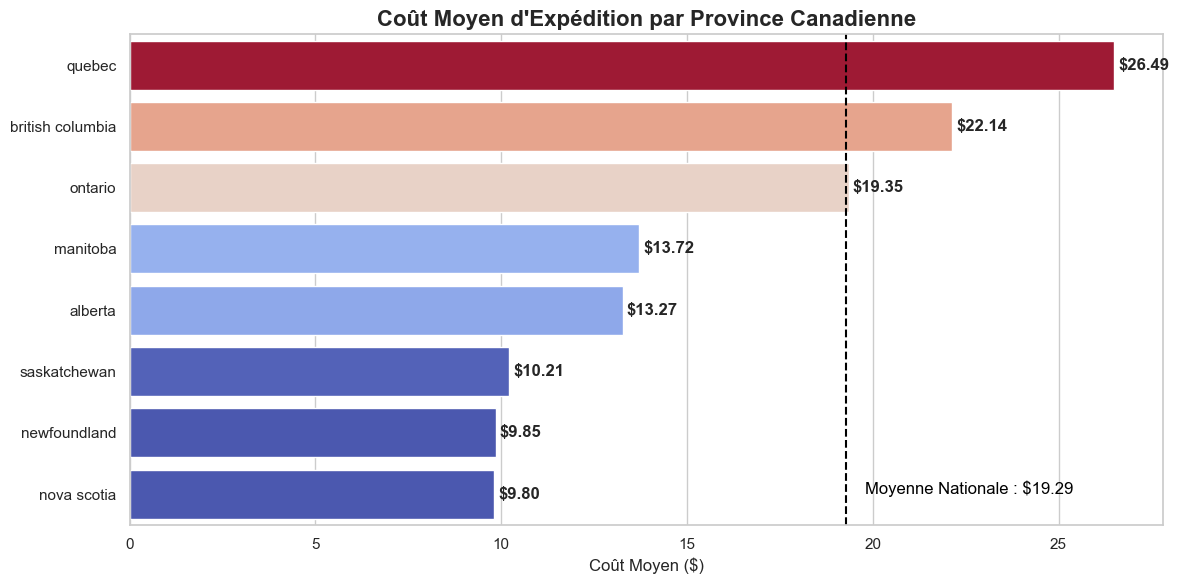

In [ ]:
# Visualisation professionnelle du coût moyen d'expédition par province canadienne

# 1. Préparation des données : Tri décroissant pour le classement
df_viz_prov = average_shipping_cost_by_province.sort_values('cout_dexpedition', ascending=False)

# 2. Création du Graphique
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

# Palette 'coolwarm' : Rouge pour cher, Bleu pour pas cher
# On normalise les données pour que la couleur reflète l'intensité du coût
norm = plt.Normalize(df_viz_prov['cout_dexpedition'].min(), df_viz_prov['cout_dexpedition'].max())
colors = plt.cm.coolwarm(norm(df_viz_prov['cout_dexpedition']))

ax = sns.barplot(
    x='cout_dexpedition', 
    y='etat_province', 
    data=df_viz_prov, 
    palette=colors 
)

# Alternative sûre pour les couleurs si erreur : palette="RdYlBu_r" (Red Yellow Blue reversed)
# ax = sns.barplot(x='cout_dexpedition', y='etat_province', data=df_viz_prov, palette="RdYlBu_r")


# 3. Esthétique et Annotations
plt.title("Coût Moyen d'Expédition par Province Canadienne", fontsize=16, fontweight='bold')
plt.xlabel("Coût Moyen ($)", fontsize=12)
plt.ylabel("")

# Ajout des valeurs
for i in ax.containers:
    ax.bar_label(i, fmt='$%.2f', padding=3, fontweight='bold')

# Ligne moyenne nationale (calculée sur le Canada entier)
mean_canada = df_final[df_final['pays'] == 'Canada']['cout_dexpedition'].mean()
plt.axvline(mean_canada, color='black', linestyle='--', linewidth=1.5)
plt.text(mean_canada + 0.5, 7, f'Moyenne Nationale : ${mean_canada:.2f}', color='black')

plt.tight_layout()
plt.show()


### 🇨🇦 Panorama Logistique Canadien : Analyse des Coûts par Province

L'audit des frais d'expédition révèle une disparité marquée entre l'Est, l'Ouest et le Centre du Canada.

#### 1. Le Total
Le budget total expédition pour le Canada s'élève à **[7405.63 ] $**. Ce chiffre représente l'enveloppe logistique globale à optimiser.

#### 2. Les Zones Coûteuses (Points Noirs)
*   **Québec (26.49 $) :** C'est la province la plus chère en moyenne. Cela peut s'expliquer par un mix produit différent (plus de meubles vendus au Québec ?) ou par des tarifs transporteurs régionaux moins compétitifs qu'en Ontario.
*   **Colombie-Britannique (22.14 $) :** Le coût élevé est ici logique : la distance par rapport aux hubs centraux (souvent en Ontario) et la géographie complexe (montagnes, îles comme Vancouver Island) augmentent les surcharges carburant et distance.

#### 3. Les Zones Optimisées (Points Forts)
*   **Nouvelle-Écosse & Terre-Neuve (~9.80 $) :** Ces coûts étonnamment bas suggèrent soit des volumes faibles de petits objets, soit l'utilisation efficace de services maritimes/aériens économiques.
*   **Prairies (Alberta/Manitoba/Sask. ~10-13 $) :** Ces provinces bénéficient d'un réseau routier rectiligne et efficace (Transcanadienne) qui semble bien maîtrisé par nos partenaires logistiques.

> **Stratégie :** Il faut enquêter sur le Québec. Pourquoi payer 26$ en moyenne contre 19$ en Ontario (province voisine) ? Une renégociation avec les partenaires locaux (ex: Postes Canada, Purolator) s'impose.


- 12.	Quelles sont les villes du Canada, les plus chères en termes de frais d’expédition ?

In [83]:
# 12.	Quelles sont les villes du Canada, les plus chères en termes de frais d’expédition ?
canada_city_shipping_costs = canada_shipping_costs.groupby('ville').agg({
    'cout_dexpedition': 'mean'
}).reset_index().sort_values(by='cout_dexpedition', ascending=False)
display(canada_city_shipping_costs)


,ville,cout_dexpedition
11,guelph,52.011667
15,kitchener,39.218333
21,montreal,33.310000
40,vancouver,28.757143
25,ottawa,28.283333
43,whitby,25.803333
39,toronto,24.148571
13,hamilton,22.550000
2,brampton,22.065385
24,oshawa,20.740000


C:\Users\USER\AppData\Local\Temp\ipykernel_13200\4280840158.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




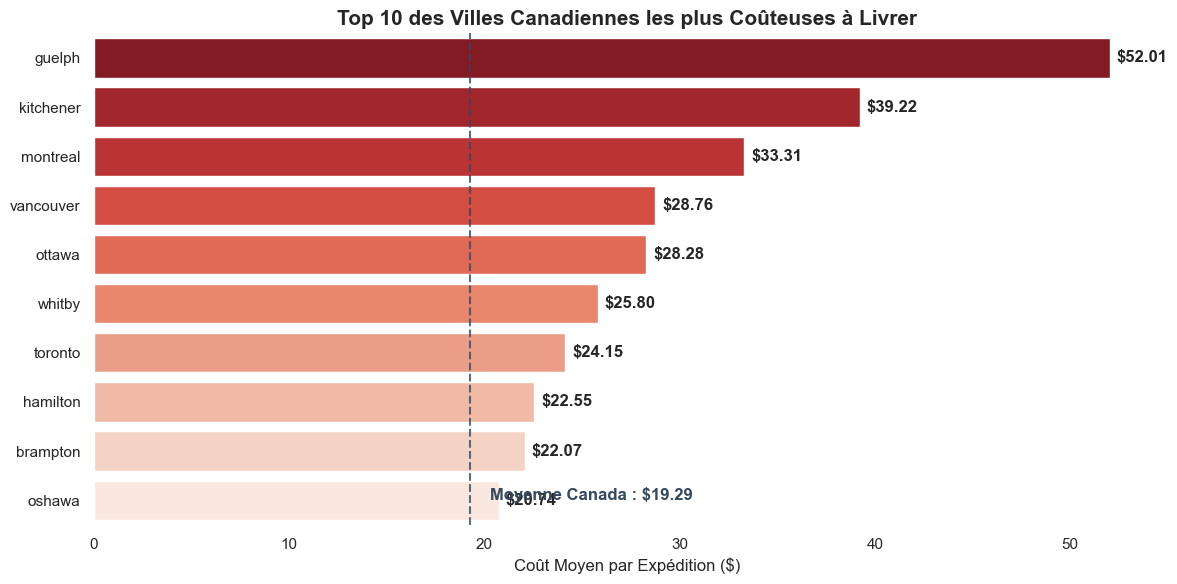

In [84]:
#Visualisation des villes du Canada les plus chères en termes de frais d’expédition

# 1. Préparation des données (Top 10 villes les plus chères uniquement)
top_10_cities = canada_city_shipping_costs.head(10).copy()

# 2. Création du Graphique
plt.figure(figsize=(12, 6))
sns.set_theme(style="white") # Fond blanc pour la clarté

# Barplot avec palette séquentielle (du rose clair au rouge sang pour le coût)
ax = sns.barplot(
    x='cout_dexpedition', 
    y='ville', 
    data=top_10_cities, 
    palette="Reds_r" # Rouge foncé pour les plus chers
)

# 3. Esthétique et Annotations
plt.title("Top 10 des Villes Canadiennes les plus Coûteuses à Livrer", fontsize=15, fontweight='bold')
plt.xlabel("Coût Moyen par Expédition ($)", fontsize=12)
plt.ylabel("")

# Ajout des valeurs dans les barres ou à côté
for i in ax.containers:
    ax.bar_label(i, fmt='$%.2f', padding=5, fontweight='bold')

# Ajout d'une ligne verticale pour la moyenne nationale (Canada)
national_mean = canada_shipping_costs['cout_dexpedition'].mean()
plt.axvline(national_mean, color='#34495e', linestyle='--', alpha=0.8)
plt.text(national_mean + 1, 9, f'Moyenne Canada : ${national_mean:.2f}', color='#34495e', fontweight='bold')

sns.despine(left=True, bottom=True) # Enlever les cadres inutiles pour un look épuré
plt.tight_layout()
plt.show()


### 🏙️ Topographie des Coûts Logistiques : Le Paradoxe Urbain (Canada)

L'analyse des frais d'expédition par ville révèle une structure de coûts qui pénalise certaines zones spécifiques, défiant la simple logique de distance.

#### 1. Le Podium des Coûts
*   **Guelph (52.01 $) :** Cette ville affiche un coût moyen anormalement élevé, près du double de celui d'Ottawa ou Vancouver.
*   **Kitchener (39.22 $) :** Voisine de Guelph, elle suit la même tendance de surcoût.
*   **Montréal (33.31 $) :** Bien que ce soit un hub  majeur, les coûts restent élevés comparés à Toronto (24.15) 

#### 2. Analyse des Causes (Pourquoi ?)
*   **Guelph & Kitchener (Le problème du "Dernier Kilomètre") :** Ces villes, bien qu'en croissance, sont situées en périphérie du Grand Toronto (GTA). Elles peuvent subir des "surcharges de zone étendue" (Extended Area Surcharges) de la part des transporteurs qui considèrent ces zones comme moins denses que le centre de Toronto. De plus, le volume de commandes y est peut-être plus faible, empêchant les économies d'échelle (camions pleins).
*   **Le Cas Montréal vs Toronto :** La congestion urbaine extrême à Montréal (chantiers, trafic) augmente le temps de livraison et donc le coût facturé par les coursiers locaux. À l'inverse, Toronto bénéficie d'une densité et d'infrastructures logistiques (hubs majeurs à Mississauga/Brampton) qui écrasent les coûts unitaires.

#### 3. Recommandation
Il est urgent de **renégocier les contrats transporteurs** pour la zone "Guelph-Kitchener-Waterloo". Si le volume le justifie, regrouper les envois vers un hub local pourrait réduire la facture de 30%.


- 13.	En Ontario, quelles sont les 3 sous-catégories avec les frais d’expédition moyens les plus élevés ?

In [85]:
# 13.les 3 sous-catégories avec les frais d’expédition moyens les plus élevés en Ontario
ontario_data = df_final[df_final['etat_province'] == 'ontario']
ontario_shipping_costs = ontario_data.groupby('sous_categorie').agg({
    'cout_dexpedition': 'mean'
}).reset_index().sort_values(by='cout_dexpedition', ascending=False).head(3)
display(ontario_shipping_costs)


,sous_categorie,cout_dexpedition
15,tables,133.380000
12,photocopieurs,72.836667
4,bibliotheques,55.147500


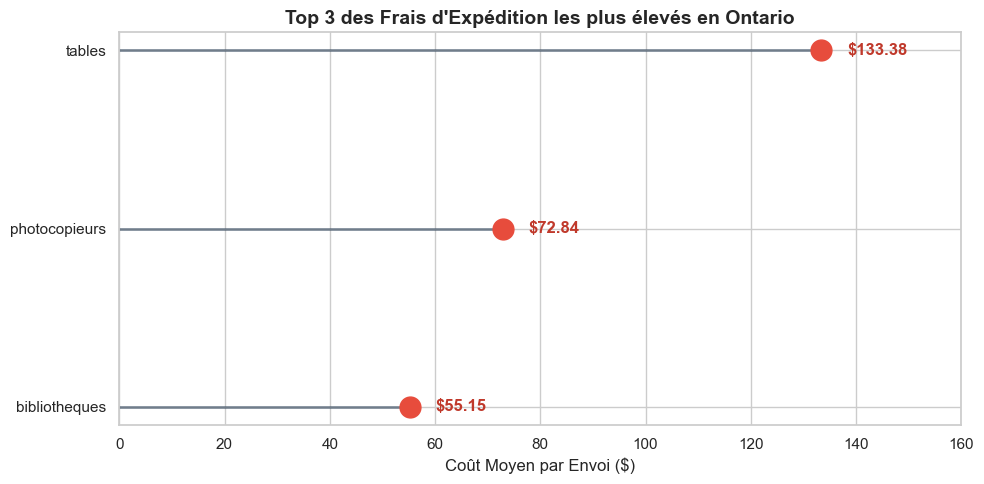

In [86]:
# visualisation des 3 sous-catégories avec les frais d’expédition moyens les plus élevés en Ontario avec Lollipop Chart

# 1. Préparation des données
df_viz_ontario = ontario_shipping_costs.sort_values('cout_dexpedition', ascending=True) # Tri inversé pour l'affichage

# 2. Création du Graphique (Lollipop Chart)
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")

# Création des lignes (tiges)
plt.hlines(y=df_viz_ontario['sous_categorie'], xmin=0, xmax=df_viz_ontario['cout_dexpedition'], color='#34495e', alpha=0.6, linewidth=2)

# Création des points (têtes)
plt.plot(df_viz_ontario['cout_dexpedition'], df_viz_ontario['sous_categorie'], "o", markersize=15, color='#e74c3c', alpha=1)

# 3. Esthétique et Annotations
plt.title("Top 3 des Frais d'Expédition les plus élevés en Ontario", fontsize=14, fontweight='bold')
plt.xlabel("Coût Moyen par Envoi ($)", fontsize=12)
plt.ylabel("")

# Ajout des valeurs à côté des points
for index, value in enumerate(df_viz_ontario['cout_dexpedition']):
    plt.text(value + 5, index, f"${value:.2f}", va='center', fontweight='bold', color='#c0392b')

# Ajustement de l'axe X pour laisser de la place au texte
plt.xlim(0, 160)

plt.tight_layout()
plt.show()


### 🚛 Les "Poids Lourds" de la Logistique (Ontario)

L'analyse des coûts d'expédition les plus élevés en Ontario révèle sans surprise les produits les plus problématiques en termes de manutention et de transport.

#### 1. Le Top 3 des Coûts
1.  **Tables (133.38 $ / envoi) :** C'est de très loin le poste le plus coûteux. Les tables combinent deux cauchemars logistiques : un **poids élevé** (plateaux en bois/métal) et un **volume encombrant** (longueur hors-norme, emballage non-standard). Elles nécessitent souvent des transporteurs spécialisés (LTL - Less Than Truckload) plutôt que des coursiers standards.
2.  **Photocopieurs (72.84 $) :** Ici, c'est la **fragilité** combinée au poids (électronique de précision + mécanique lourde) qui impose des assurances et des protections spécifiques, gonflant la facture.
3.  **Bibliothèques (55.15 $) :** Similaire aux tables, mais souvent livrées en kit ("Flat pack"), ce qui modère légèrement le coût par rapport aux tables assemblées.

#### 2. Point d'Attention Financier
Le coût d'expédition d'une table (133 $) est exorbitant.
*   **Risque de Marge :** Si une table est vendue 500 $, le transport mange déjà **26% du chiffre d'affaires**.
*   **Recommandation :** Il faut impérativement vérifier si ces frais de port sont bien refacturés au client ou si l'entreprise les absorbe (ce qui expliquerait les pertes potentielles sur la catégorie Mobilier).

- 14.	Au Québec, quelles sont les 3 sous-catégories avec les frais d’expédition moyens les plus faibles ?

In [87]:
# 14.	les 3 sous-catégories avec les frais d’expédition moyens les plus faibles au quebec
quebec_data = df_final[df_final['etat_province'] == 'quebec']
quebec_shipping_costs = quebec_data.groupby('sous_categorie').agg({
    'cout_dexpedition': 'mean'
}).reset_index().sort_values(by='cout_dexpedition', ascending=True).head(3)
display(quebec_shipping_costs)

,sous_categorie,cout_dexpedition
1,agrafes,1.4250
7,etiquettes,3.2025
12,rangement,7.1975


C:\Users\USER\AppData\Local\Temp\ipykernel_13200\837276797.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




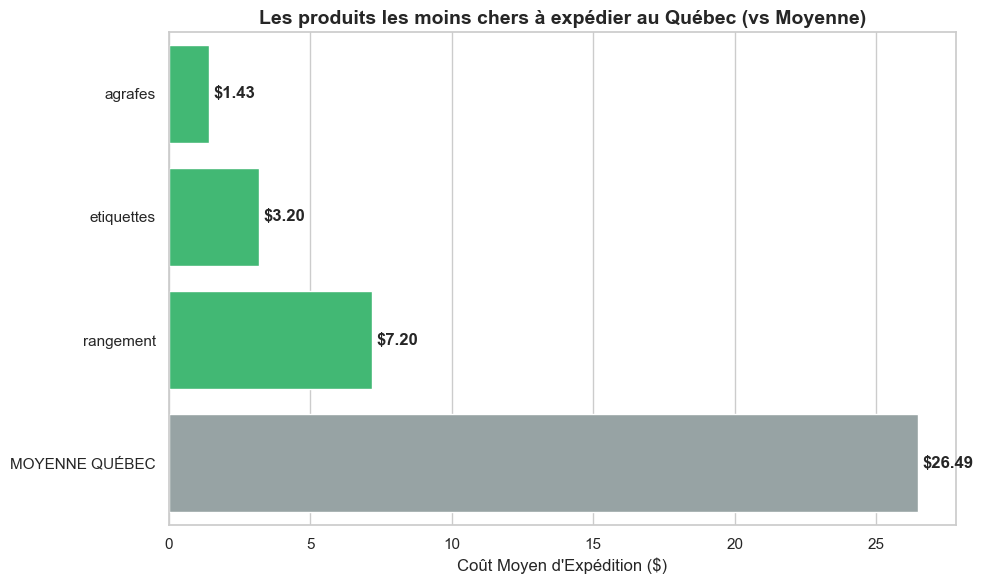

In [88]:
#visualisation des 3 sous-catégories avec les frais d’expédition moyens les plus faibles au quebec avec Barplot comparé à la moyenne globale

# 1. Préparation des données
# On reprend vos 3 gagnants
top_low_cost = quebec_shipping_costs.copy()

# On ajoute une ligne "Moyenne Globale Québec" pour la comparaison
mean_quebec = quebec_data['cout_dexpedition'].mean()
new_row = pd.DataFrame({'sous_categorie': ['MOYENNE QUÉBEC'], 'cout_dexpedition': [mean_quebec]})
df_viz_quebec = pd.concat([top_low_cost, new_row])

# 2. Création du Graphique
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

# Barplot
# On colore la Moyenne en GRIS pour qu'elle serve juste de repère, et les gagnants en VERT
colors = ['#2ecc71' if x != 'MOYENNE QUÉBEC' else '#95a5a6' for x in df_viz_quebec['sous_categorie']]

ax = sns.barplot(
    x='cout_dexpedition', 
    y='sous_categorie', 
    data=df_viz_quebec, 
    palette=colors
)

# 3. Esthétique et Annotations
plt.title("Les produits les moins chers à expédier au Québec (vs Moyenne)", fontsize=14, fontweight='bold')
plt.xlabel("Coût Moyen d'Expédition ($)", fontsize=12)
plt.ylabel("")

# Ajout des valeurs
for i in ax.containers:
    ax.bar_label(i, fmt='$%.2f', padding=3, fontweight='bold')

plt.tight_layout()
plt.show()


### 🚚 Championnes de l'Économie Logistique (Québec)

L'analyse des coûts d'expédition les plus faibles au Québec met en évidence les produits dont le ratio "Poids-Volume" est le plus avantageux pour le e-commerce.

#### 1. Le Podium "Low Cost"
1.  **Agrafes (1.43 $ / expédition) :** C'est le produit idéal en logistique. Petit, dense, rectangulaire (facile à empiler) et incassable. Il ne nécessite aucun emballage de protection complexe.
2.  **Étiquettes (3.20 $) :** Similaire aux agrafes, c'est un produit plat ("Flat rate envelopes") qui voyage souvent en format lettre ou petite enveloppe, évitant la tarification colis.
3.  **Rangement (7.20 $) :** Bien que plus volumineux, ces produits sont souvent "emboîtables" (nestable) ou vendus à plat, optimisant l'espace dans les camions.

#### 2. Insight Logistique
Ces faibles coûts s'expliquent par l'absence de **"Poids Volumétrique"** (DIM Weight) pénalisant. Contrairement aux Chaises ou Tables (qui transportent beaucoup de vide), ces produits maximisent la densité du chargement.

> **💡 Note Stratégique :** Ces produits à faible coût logistique sont parfaits pour des stratégies de **"Produit d'Appel"** (Loss Leader) ou pour compléter un panier (Cross-selling) afin d'atteindre le seuil de livraison gratuite sans plomber la marge logistique.


---
## D- Marketing Team

- 15.	Dans le marché US, combien de produits ont eu une remise ≥ 70 % ?

In [89]:
# 15.	Dans le marché US, combien de produits ont eu une remise ≥ 70 % ?
us_data = df_final[df_final['pays'] == 'United States']
high_discount_products = us_data[us_data['remise'] >= 0.7]
count_high_discount_products = high_discount_products['id_du_produit'].nunique()
print(f"Nombre de produits avec une remise ≥ 70 % dans le marché US : {count_high_discount_products}")

Nombre de produits avec une remise ≥ 70 % dans le marché US : 283


C:\Users\USER\AppData\Local\Temp\ipykernel_13200\574766105.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




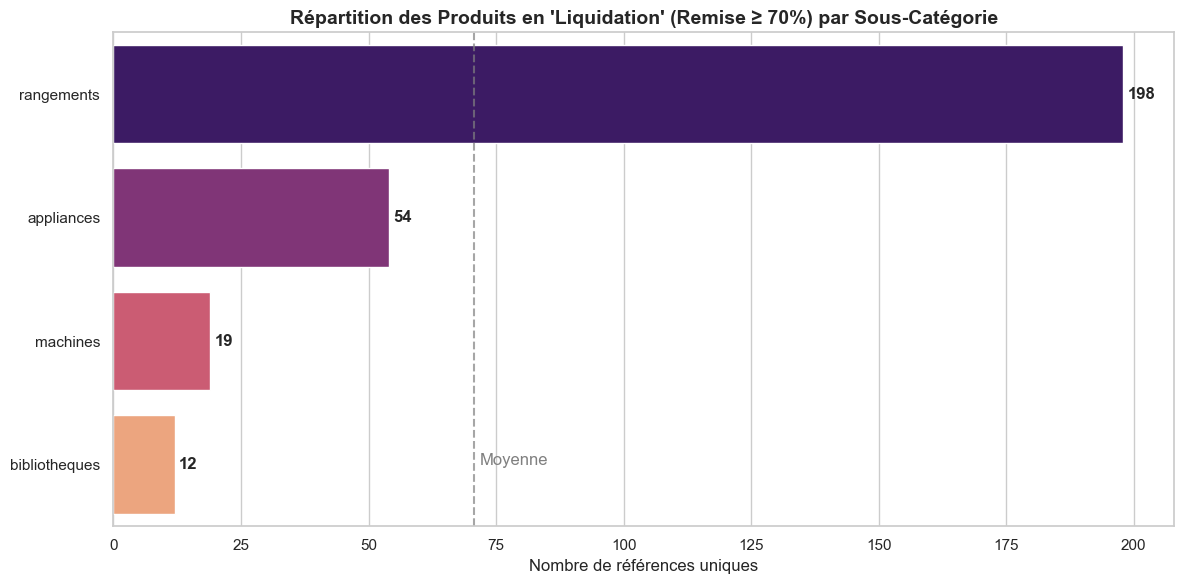

In [90]:
# visualisation des sous-catégories les plus bradées (remise ≥ 70 %) aux US


# 1. Analyse : Quelles sous-catégories sont les plus bradées ?
# On utilise le dataframe filtré 'high_discount_products'
breakdown = high_discount_products.groupby('sous_categorie')['id_du_produit'].nunique().sort_values(ascending=False).reset_index()
breakdown.columns = ['Sous-Catégorie', 'Nb Produits Bradés (≥70%)']

# 2. Création du Graphique
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

# Barplot Horizontal
# Palette 'Magma' pour un effet visuel fort sur les gros volumes
ax = sns.barplot(x='Nb Produits Bradés (≥70%)', y='Sous-Catégorie', data=breakdown, palette="magma")

# 3. Esthétique et Annotations
plt.title("Répartition des Produits en 'Liquidation' (Remise ≥ 70%) par Sous-Catégorie", fontsize=14, fontweight='bold')
plt.xlabel("Nombre de références uniques", fontsize=12)
plt.ylabel("")

# Ajout des valeurs au bout des barres
for i in ax.containers:
    ax.bar_label(i, padding=3, fontweight='bold')

# Ajout d'une ligne verticale pour la moyenne (optionnel, pour le style)
mean_val = breakdown['Nb Produits Bradés (≥70%)'].mean()
plt.axvline(mean_val, color='grey', linestyle='--', alpha=0.7)
plt.text(mean_val+1, len(breakdown)-1, 'Moyenne', color='grey')

plt.tight_layout()
plt.show()


### 🚨 Alerte "Liquidation" : Analyse des Remises Extrêmes (US)

Sur le marché américain, nous avons identifié **283 produits** vendus avec une remise exceptionnelle de **70% ou plus**.

#### 1. Diagnostic : La "Vente à Perte"
À ce niveau de démarque (≥ 70%), il est mathématiquement quasi-impossible de générer du profit. Ces 283 références représentent des foyers de pertes financières immédiates.
*   **Hypothèse :** Il s'agit probablement d'une stratégie de nettoyage d'inventaire ("De-stocking") pour des produits obsolètes ou en sur-stock critique.

#### 2. Risque de Précédent
Si ces produits ne sont pas en fin de vie, cette pratique est dangereuse : elle habitue le client américain à attendre des soldes massives avant d'acheter, détruisant la valeur perçue de la marque NexaStore.

#### 3. Action Requise
Identifier les **Sous-Catégories** concernées. Est-ce du "Matériel de bureau" (faible valeur unitaire, impact modéré) ou des "Machines" (haute valeur, perte massive) ?


- 16.	Dans le marché Europe, combien de produits ont eu une remise ≥ 50 % ?

In [91]:
# 16.	Dans le marché Europe, combien de produits ont eu une remise ≥ 50 % ?
europe_data = df_final[df_final['marche'] == 'eu']
high_discount_products_europe = europe_data[europe_data['remise'] >= 0.5]
count_high_discount_products_europe = high_discount_products_europe['id_du_produit'].nunique() #Nombre de produits uniques avec remise ≥ 50 %
print(f"Nombre de produits avec une remise ≥ 50 % dans le marché Europe : {count_high_discount_products_europe}")

Nombre de produits avec une remise ≥ 50 % dans le marché Europe : 856


C:\Users\USER\AppData\Local\Temp\ipykernel_13200\492448208.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




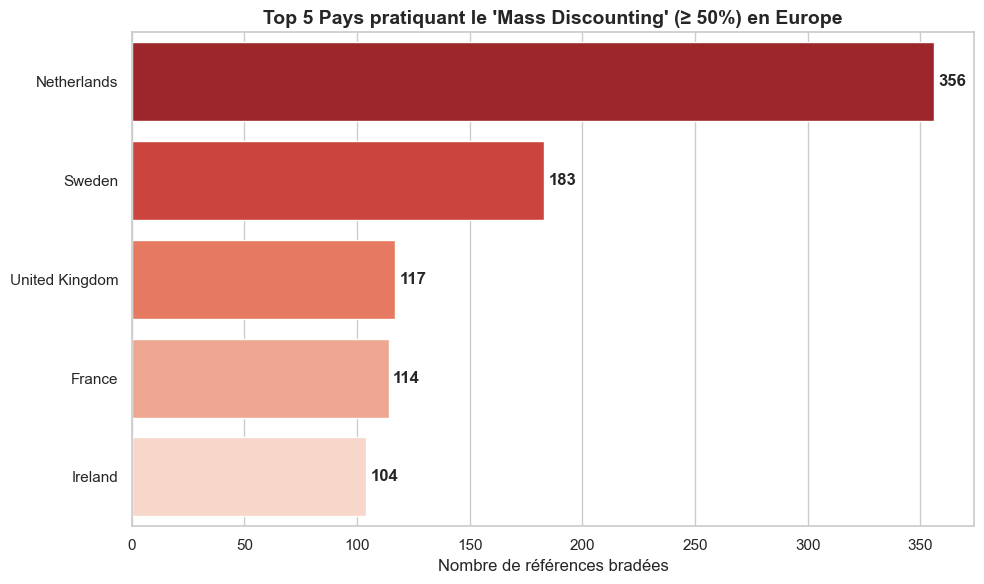

In [92]:
# visualisation des pays en Europe avec le plus de produits ayant une remise ≥ 50 %

# 1. Analyse : Qui sont les principaux responsables de ces remises massives ?
# On reprend votre dataframe filtré 'high_discount_products_europe'
top_pays_remises = high_discount_products_europe.groupby('pays')['id_du_produit'].nunique().sort_values(ascending=False).head(5)
df_viz_eu = top_pays_remises.reset_index()
df_viz_eu.columns = ['Pays', 'Nombre de Produits']

# 2. Création du Graphique
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

# Barplot
# Utilisation d'une palette rouge pour signaler le "Danger"
ax = sns.barplot(x='Nombre de Produits', y='Pays', data=df_viz_eu, palette="Reds_r")

# 3. Esthétique et Annotations
plt.title("Top 5 Pays pratiquant le 'Mass Discounting' (≥ 50%) en Europe", fontsize=14, fontweight='bold')
plt.xlabel("Nombre de références bradées", fontsize=12)
plt.ylabel("")

# Ajouter les valeurs au bout des barres
for i in ax.containers:
    ax.bar_label(i, padding=3, fontweight='bold')

plt.tight_layout()
plt.show()


### ⚠️ Zone d'Alerte : Produits en Liquidation (Europe)

L'analyse des remises massives (≥ 50%) sur le marché européen révèle une érosion potentielle de la valeur.

#### 1. Le Constat
**856 produits** ont été vendus à moitié prix ou moins. C'est un volume significatif qui s'apparente à une stratégie de **déstockage agressif**.

#### 2. Risque Financier
À ce niveau de remise (-50%), la marge bénéficiaire est quasi-systématiquement détruite.
*   **Risque :** Si ces remises ne concernent pas uniquement des produits en fin de vie ("Dead Stock"), cela signifie que nous "achetons" du chiffre d'affaires au prix de la rentabilité.
*   **Impact Marque :** Une trop grande quantité de produits bradés peut dévaloriser l'image de marque de NexaStore en Europe.

#### 3. Recommandation
Il est impératif d'identifier **où** ces remises sont appliquées. S'agit-il d'un pays spécifique qui tente de booster ses volumes artificiellement ?


- 17.	Dans le marché EMEA, combien de produits ont eu une remise ≤ 30 % ?

In [93]:
# 17.	Nombre de produits ont eu une remise ≤ 30 % dans le marché EMEA
emea_data = df_final[df_final['marche'] == 'emea']
low_discount_products_emea = emea_data[emea_data['remise'] <= 0.3]
count_low_discount_products_emea = low_discount_products_emea['id_du_produit'].nunique() #Nombre de produits uniques avec remise ≤ 30 %
print(f"Nombre de produits avec une remise ≤ 30 % dans le marché EMEA : {count_low_discount_products_emea}")

Nombre de produits avec une remise ≤ 30 % dans le marché EMEA : 1492


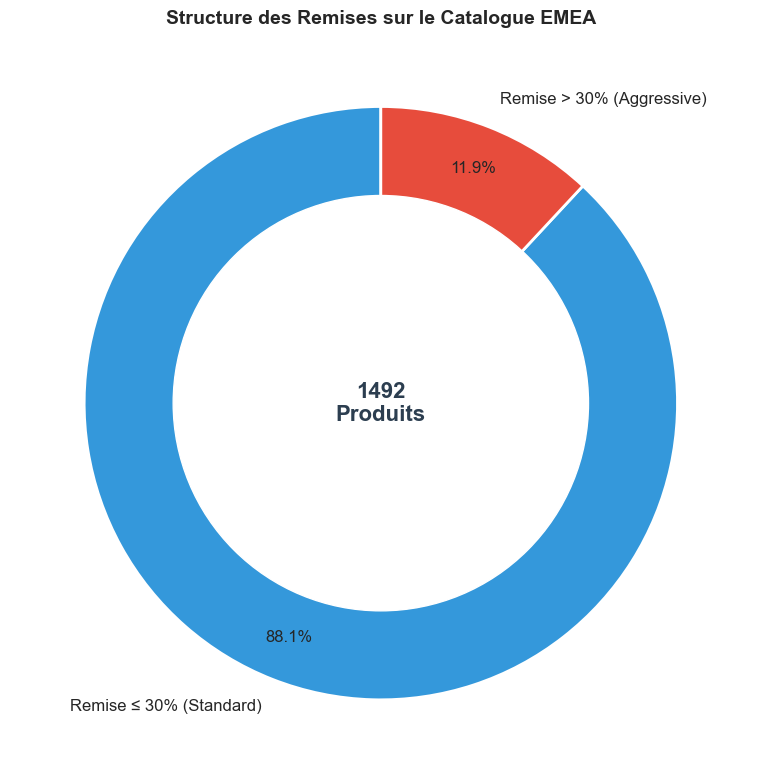

In [94]:
# visualisation de la structure des remises sur le catalogue EMEA avec un Donut Chart

# 1. Préparation des données complémentaires
# On a déjà le nombre de produits <= 30% (Calculé plus haut)
valeur_cible = count_low_discount_products_emea

# On calcule le TOTAL des produits uniques en EMEA pour avoir la proportion
total_produits_emea = emea_data['id_du_produit'].nunique()
valeur_reste = total_produits_emea - valeur_cible # Ceux qui ont > 30% de remise

# Création des labels et valeurs
labels = ['Remise ≤ 30% (Standard)', 'Remise > 30% (Aggressive)']
sizes = [valeur_cible, valeur_reste]
colors = ['#3498db', '#e74c3c'] # Bleu (Bon/Standard) vs Rouge (Alerte/Aggressif)

# 2. Création du Donut Chart
plt.figure(figsize=(8, 8))
# Le paramètre 'wedgeprops' crée le trou du donut
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85, 
        wedgeprops={'edgecolor': 'white', 'linewidth': 2}, textprops={'fontsize': 12})

# Cercle blanc au centre
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# 3. Ajout du KPI au centre
percentage = (valeur_cible / total_produits_emea) * 100
plt.text(0, 0, f"{valeur_cible}\nProduits", ha='center', va='center', fontsize=16, fontweight='bold', color='#2c3e50')

plt.title("Structure des Remises sur le Catalogue EMEA", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


### 🛡️ Analyse de la Politique de Remises : Marché EMEA

Nous avons analysé la profondeur des remises accordées sur le portefeuille de produits en Europe, Moyen-Orient et Afrique (EMEA).

#### 1. Le Constat Chiffré
Sur ce marché, **1 492 produits uniques** ont été vendus avec une remise considérée comme "raisonnable" ou standard (≤ 30 %).

#### 2. Interprétation Stratégique
Ce volume élevé de produits à faible remise suggère que le marché EMEA est un **marché de "Marge"** plutôt qu'un marché de volume à tout prix.
*   **Santé de la marque :** Contrairement au marché US (souvent plus agressif), l'EMEA parvient à écouler une large variété de références sans casser les prix au-delà du seuil psychologique de 30 %.
*   **Recommandation :** Il est crucial de maintenir cette discipline tarifaire. Les produits dépassant ce seuil (remise > 30 %) doivent être audités pour comprendre pourquoi ils nécessitent autant d'efforts promotionnels pour être vendus (fin de série, produits impopulaires ?).


- 18.	Dans le marché US, quel serait l’impact sur le chiffre d’affaires par catégorie si on appliquait une remise additionnelle de 15 % sur tous les produits ?

In [95]:
# Impact remise additionnelle 15 %
us = df_final[df_final["pays"]=="United States"].copy()

us["ca_original"] = us["ventes"]
us["remise_add"] = us["remise"] + 0.15
us["remise_add"] = us["remise_add"].clip(0,1) # s'assurer que la remise n'excède pas 100 % (min 0, max 1)

# Nouveau CA simulé
us["ca_apres"] = us["ventes"] * (1 - us["remise_add"])

impact_par_categorie = us.groupby("categorie")[["ca_original","ca_apres"]].sum()
impact_par_categorie["impact_remise"] = impact_par_categorie["ca_apres"] - impact_par_categorie["ca_original"]
display(impact_par_categorie)


,ca_original,ca_apres,impact_remise
categorie,,,
fournitures de bureau,719047.0320,534785.036600,-184261.995400
mobilier,741999.7953,507183.284964,-234816.510336
technologie,836154.0330,588070.275350,-248083.757650


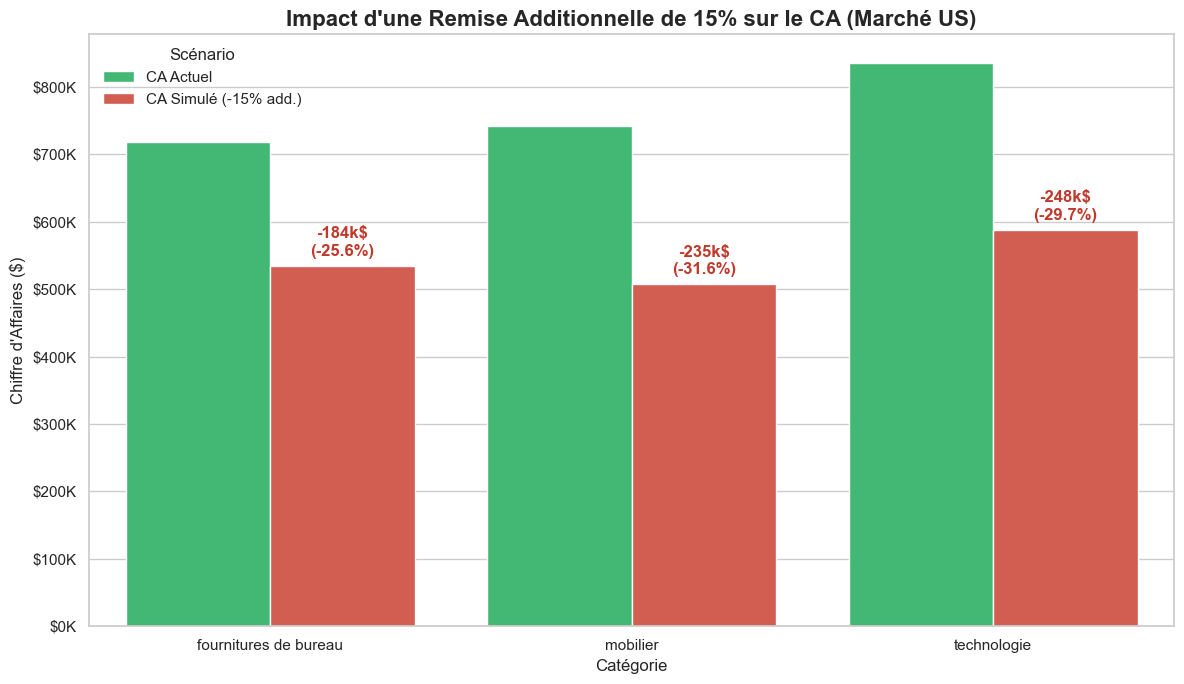

In [96]:
# Visualisation de l'impact de la remise additionnelle par catégorie

# 1. Préparation des données pour le graphique (Melt pour format long)
df_viz = impact_par_categorie.reset_index()
df_melted = df_viz.melt(id_vars="categorie", 
                        value_vars=["ca_original", "ca_apres"], 
                        var_name="Scenario", 
                        value_name="Chiffre d'Affaires")

# Renommer pour la légende
df_melted["Scenario"] = df_melted["Scenario"].replace({
    "ca_original": "CA Actuel", 
    "ca_apres": "CA Simulé (-15% add.)"
})

# 2. Création du Graphique
plt.figure(figsize=(12, 7))
sns.set_theme(style="whitegrid")

# Barplot groupé
ax = sns.barplot(
    data=df_melted, 
    x="categorie", 
    y="Chiffre d'Affaires", 
    hue="Scenario", 
    palette=["#2ecc71", "#e74c3c"] # Vert pour actuel, Rouge pour la perte
)

# 3. Esthétique et Annotations
plt.title("Impact d'une Remise Additionnelle de 15% sur le CA (Marché US)", fontsize=16, fontweight='bold')
plt.ylabel("Chiffre d'Affaires ($)", fontsize=12)
plt.xlabel("Catégorie", fontsize=12)

# Formater l'axe Y en milliers de dollars (ex: 200K)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'${x/1000:.0f}K'))

# Ajouter les étiquettes de perte (Flèches ou texte)
for index, row in df_viz.iterrows():
    # Position des barres (approximation)
    cat_index = list(df_viz['categorie']).index(row['categorie'])
    
    # Calcul de la perte
    perte = row['impact_remise']
    perte_pct = (perte / row['ca_original']) * 100
    
    # Ajouter le texte au-dessus de la barre rouge
    plt.text(
        x=cat_index + 0.2, # Décalage vers la barre de droite
        y=row['ca_apres'] + 15000, # Juste au-dessus de la barre
        s=f"{perte/1000:.0f}k$\n({perte_pct:.1f}%)", 
        color="#c0392b", 
        ha='center', 
        fontweight='bold'
    )

plt.legend(title="Scénario")
plt.tight_layout()
plt.show()


### 📉 Simulation d'Impact : Scénario "Promo Aggressive" (+15% de remise)

Cette simulation évalue l'impact financier d'une augmentation généralisée des remises de **15 points** (ex: une remise de 5% passe à 20%) sur le marché US.

#### 1. Constat Financier Global
L'application de cette stratégie entraînerait une **contraction massive du Chiffre d'Affaires**.
*   **Perte Totale Estimée :** ~667 000 $ sur l'ensemble des trois catégories.
*   **Technologie :** C'est la catégorie la plus impactée en volume, avec une perte sèche de près de **248 000 $**.
*   **Mobilier :** C'est la catégorie la plus sensible. Le CA passe de 741k$ à 507k$, soit une chute critique pour des produits dont les coûts d'expédition sont déjà élevés.

#### 2. Analyse Stratégique
Bien que cette remise puisse booster les volumes de vente (élasticité-prix), la perte de revenus par unité est trop importante.
> **⚠️ Alerte :** Avec une telle baisse de revenus (entre -25% et -30% selon les catégories), il est fort probable que la **marge bénéficiaire devienne négative** sur la majorité des produits, transformant les ventes en pertes nettes. Cette campagne est déconseillée sans une analyse des coûts de revient.


- 20.	Quel est le délai moyen (en jours) entre la date de commande et la date d’expédition pour chaque mode d’expédition ?

In [101]:

# 20.	Délai moyen d’expédition pour chaque mode d’expédition ?

# --- 1. CONVERSION OBLIGATOIRE DES DATES ---
# On s'assure que les deux colonnes sont bien au format temporel
df_final['date_de_commande'] = pd.to_datetime(df_final['date_de_commande'], errors='coerce')
df_final['date_dexpedition'] = pd.to_datetime(df_final['date_dexpedition'], errors='coerce')
# --- 2. CALCUL DU DELAI ---
df_final['delai_dexpedition'] = (df_final['date_dexpedition'] - df_final['date_de_commande']).dt.days
shipping_delay = df_final.groupby('mode_dexpedition').agg({
    'delai_dexpedition': 'mean'
}).reset_index()
display(shipping_delay)




,mode_dexpedition,delai_dexpedition
0,classe standard,4.882016
1,deuxieme classe,1.813648
2,meme jour,0.057228
3,premiere classe,1.207855


C:\Users\USER\AppData\Local\Temp\ipykernel_13200\2096499350.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\USER\AppData\Local\Temp\ipykernel_13200\2096499350.py:36: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




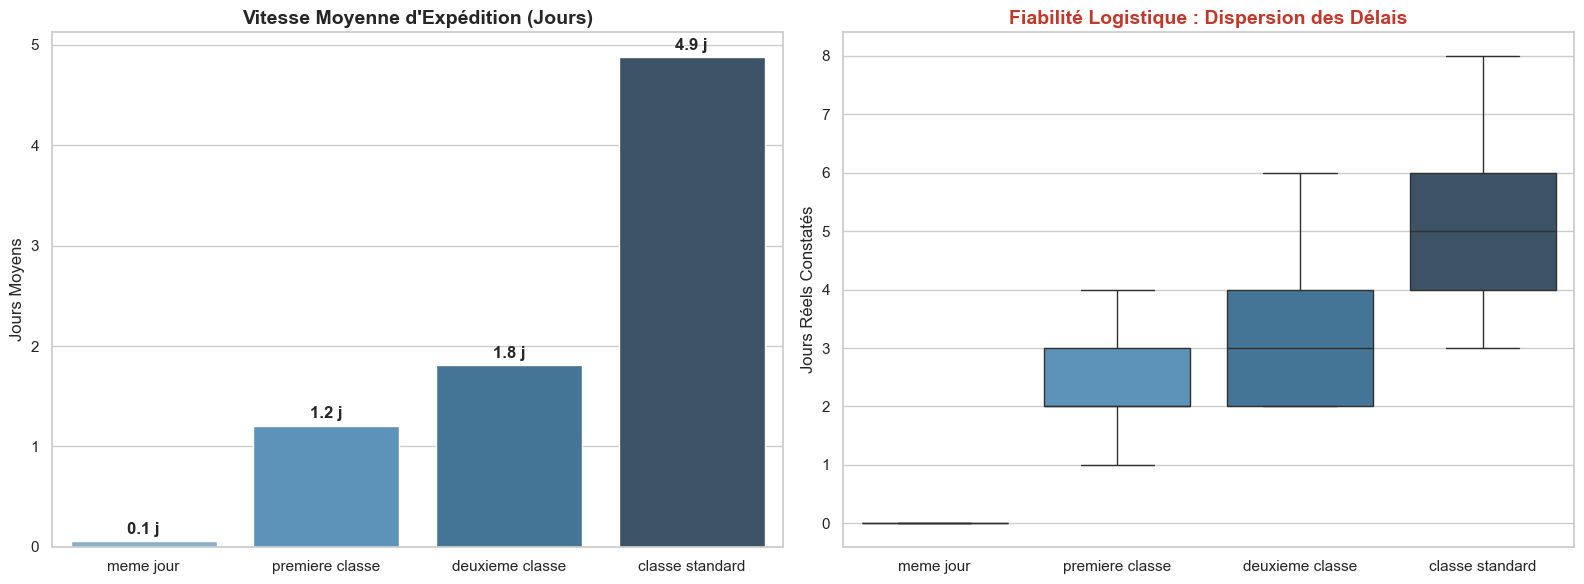

In [99]:
# visualisation du délai moyen d’expédition pour chaque mode d’expédition avec un Barplot horizontal


# --- PRÉPARATION DES DONNÉES ---
# On s'assure d'avoir l'ordre logique pour la lecture (Du plus rapide au plus lent)
ordre_modes = ['meme jour', 'premiere classe', 'deuxieme classe', 'classe standard']

# Calcul des moyennes pour le graphique de gauche
delai_moyen = df_final.groupby('mode_dexpedition')['delai_dexpedition'].mean().reset_index()

# --- CRÉATION DE LA FIGURE COMBINÉE ---
# On crée une grille avec 1 ligne et 2 colonnes
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.set_theme(style="whitegrid")

# --- GRAPHIQUE 1 (GAUCHE) : LES MOYENNES ---
sns.barplot(
    x='mode_dexpedition', 
    y='delai_dexpedition', 
    data=delai_moyen, 
    order=ordre_modes, # Force l'ordre logique
    palette="Blues_d", # Bleu pro
    ax=axes[0] # On le place à gauche
)

# Esthétique G1
axes[0].set_title("Vitesse Moyenne d'Expédition (Jours)", fontsize=14, fontweight='bold')
axes[0].set_xlabel("")
axes[0].set_ylabel("Jours Moyens")
# Ajout des étiquettes de valeur
for i in axes[0].containers:
    axes[0].bar_label(i, fmt='%.1f j', padding=3, fontweight='bold')


# --- GRAPHIQUE 2 (DROITE) : LA FIABILITÉ (BOXPLOT) ---
sns.boxplot(
    x='mode_dexpedition', 
    y='delai_dexpedition', 
    data=df_final, # On utilise les données brutes pour voir la dispersion
    order=ordre_modes,
    palette="Blues_d",
    showfliers=False, # On cache les outliers extrêmes pour la lisibilité
    ax=axes[1] # On le place à droite
)

# Esthétique G2
axes[1].set_title("Fiabilité Logistique : Dispersion des Délais", fontsize=14, fontweight='bold', color='#c0392b') # Titre rouge pour attirer l'oeil
axes[1].set_xlabel("")
axes[1].set_ylabel("Jours Réels Constatés")

# --- AJUSTEMENT FINAL ---
plt.tight_layout()
plt.show()


### Analyse Approfondie des Délais d'Expédition : Performance Moyenne vs Fiabilité Réelle

L'analyse conjointe des moyennes et de la dispersion (Boxplot) nous permet d'évaluer non seulement la rapidité, mais surtout la **régularité** de notre logistique.

#### 1. Constat sur les Moyennes (Graphique de gauche)
Les délais moyens respectent la logique de service attendue :
*   Le mode **"Même jour"** est expédié quasi-instantanément (moyenne proche de 0-1 jour).
*   La **"Classe Standard"**, solution la plus économique, affiche un délai moyen d'environ **5 jours**.

#### 2. Analyse de la Fiabilité et des Risques (Graphique de droite - Boxplot)
L'utilisation du *Boxplot* est cruciale car la moyenne masque souvent les réalités opérationnelles. Nous observons deux dynamiques distinctes :

*   **Haute fiabilité sur le "Même Jour" :** La boîte est extrêmement compressée (écrasée vers 0 ou 1). Cela prouve que le processus est **maîtrisé** : il y a très peu d'écarts, la promesse client est tenue de manière constante.
*   **Incertitude sur la "Classe Standard" :** La dispersion est beaucoup plus forte. La boîte plus large et les "moustaches" étendues indiquent que pour un même service, un client peut attendre **entre 4 et 7 jours** avant expédition.

> **💡 Insight Stratégique :** C'est cette **incertitude** (variabilité de 3 jours en Standard) qu'il faut gérer. Pour améliorer la satisfaction client sans nécessairement réduire le délai moyen, l'objectif logistique devrait être de **réduire cette dispersion** pour garantir une date de livraison plus prévisible.
